In [1]:
import tensorflow as tf
import scipy
import cv2
import os
import numpy as np
from PIL import Image

from model import MyModel
from config import num_epochs, learning_rate, batch_size, weight_path, image_shape, test_dir, result_path
from dataload import test_generator
from deeplab import DeepLabV3Plus

#test_dir ='/home/ubuntu/'
# COLORMAP = [[0, 0, 255], [0, 255, 0]]
COLORMAP = [[0, 255, 0],[0, 0, 0],[0,0,255],[255,0,0]] #The former is the background, the latter is the things other than background
cm = np.array(COLORMAP).astype(np.uint8)

def addweight(pred, test_img):
    # add transparent channel on the original picture
    pred = Image.fromarray(pred.astype('uint8')).convert('RGB')

    test_img = test_img[0]
    out = np.zeros(test_img.shape, test_img.dtype)
    cv2.normalize(test_img, out, 0,
                  255, cv2.NORM_MINMAX)
    image = Image.fromarray(out.astype('uint8')).convert('RGB')
    
    #image = Image.blend(image,pred,0.3)
    #return image
    return pred


def write_pred(image, pred, x_names):
    
    pred = pred[0]  # pred's dim:[h, w, n_class]
    x_name = x_names[0]
    pred = np.argmax(pred, axis=2)  # get the largest number of the channel
    pred = cm[pred]  # convert the pixel value to color map

    weighted_pred = addweight(pred, image) 
    
    #weighted_pred.save(os.path.join(result_path,filename.split("/")[-1]))
    weighted_pred.save('result.png')
    print(filename.split("/")[-1]+" finished")


# def write_img(pred_images, filename):

#     pred = pred_images[0]
#     COLORMAP = [[0, 0, 255], [0, 255, 0]]
#     cm = np.array(COLORMAP).astype(np.uint8)

#     pred = np.argmax(np.array(pred), axis=2)

#     pred_val = cm[pred]
#     cv2.imwrite(os.path.join("data",filename.split("/")[-1]), pred_val)
#     print(os.path.join("data",filename.split("/")[-1])+"finished")


test_dataset = tf.data.Dataset.from_generator(
    test_generator, tf.float32, tf.TensorShape([None, None, None]))
test_dataset = test_dataset.batch(5)

#model = DeepLabV3Plus(image_shape[0], image_shape[1], nclasses=4)
model = MyModel(4)
model.load_weights(weight_path+'fcn_20191021.ckpt')

test_list_dir = os.listdir(test_dir)
test_list_dir.sort()
test_filenames = [test_dir + filename for filename in test_list_dir]


/Users/chenwu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
def compare(testcase):
    filename='/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/render/render'+testcase+'.png'
    image = scipy.misc.imresize(scipy.misc.imread(filename), image_shape)
    image = image[np.newaxis, :, :, :].astype("float32")
    out = model.predict(image)
    pred = out[0]  # pred's dim:[h, w, n_class]
    #x_name = x_names[0]
    pred = np.argmax(pred, axis=2)  # get the largest number of the channel
    pred = cm[pred]  # convert the pixel value to color map
    weighted_pred = addweight(pred, image) 
    
    y_true = '/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/clean/clean'+testcase+'.png'
    true = scipy.misc.imresize(scipy.misc.imread(y_true), image_shape)
    
    plt.figure(figsize=(30,30))
    plt.subplot(5,5,1)
    plt.imshow(weighted_pred)
    plt.subplot(5,5,2)
    plt.imshow(true)

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.

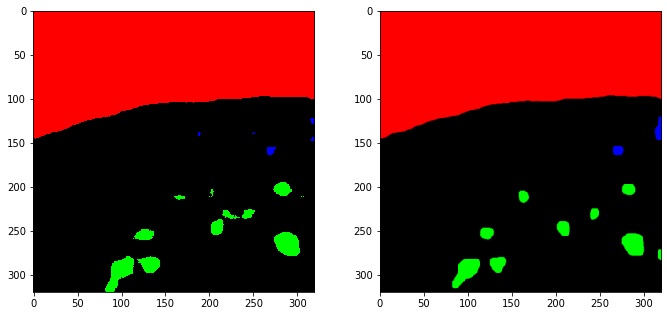

In [5]:
compare('7200')

In [6]:
def pair(testcase):
    filename='/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/render/render'+testcase+'.png'
    image = scipy.misc.imresize(scipy.misc.imread(filename), image_shape)
    image = image[np.newaxis, :, :, :].astype("float32")
    out = model.predict(image)
    pred = out[0]  # pred's dim:[h, w, n_class]
    #x_name = x_names[0]
    pred = np.argmax(pred, axis=2)  # get the largest number of the channel
    pred = cm[pred]  # convert the pixel value to color map
    weighted_pred = addweight(pred, image) 
    
    
    filename='/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/clean/clean'+testcase+'.png'
    true = scipy.misc.imresize(scipy.misc.imread(filename), image_shape)
    
    return np.array(weighted_pred), true


In [7]:
pair('0001')[0].shape

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

(320, 320, 3)

In [8]:
pair('0001')[1].shape

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

(320, 320, 3)

In [9]:
target = pair('0236')[1]
prediction =  pair('0236')[0]
intersection = np.logical_and(target, prediction)

union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

#np.sum(union)
iou_score

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

0.9567802173754468

In [ ]:
total_iou = 0
bad_img = 0
from tqdm import tqdm
for i in tqdm(range(1,6401)):
    
    number = '{0:04}'.format(i)
    target = pair(number)[1]
    prediction =  pair(number)[0]
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    
    if np.sum(union) != 0 :
        iou_score = np.sum(intersection) / np.sum(union)
        total_iou = total_iou+iou_score
    else:
        bad_img += 1
    
    print(total_iou/(i-bad_img))
    
    #iou_score

  0%|          | 0/6400 [00:00<?, ?it/s]/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is 

0.987998863797756


  0%|          | 2/6400 [00:03<2:50:58,  1.60s/it]

0.9106132153739384


  0%|          | 3/6400 [00:04<2:50:09,  1.60s/it]

0.7336827426626357


  0%|          | 4/6400 [00:06<2:49:44,  1.59s/it]

0.7989400659635246


  0%|          | 5/6400 [00:07<2:50:35,  1.60s/it]

0.7932248123094178


  0%|          | 6/6400 [00:09<2:47:14,  1.57s/it]

0.8101284162126148


  0%|          | 7/6400 [00:10<2:44:20,  1.54s/it]

0.8287276519798462


  0%|          | 8/6400 [00:12<2:42:55,  1.53s/it]

0.8241323681556201


  0%|          | 9/6400 [00:13<2:40:43,  1.51s/it]

0.7325621050272179


  0%|          | 10/6400 [00:15<2:40:05,  1.50s/it]

0.7584040047093241


  0%|          | 11/6400 [00:16<2:39:51,  1.50s/it]

0.7666957786344795


  0%|          | 12/6400 [00:18<2:39:43,  1.50s/it]

0.7858961684165386


  0%|          | 13/6400 [00:19<2:39:22,  1.50s/it]

0.8005285077833625


  0%|          | 14/6400 [00:21<2:39:24,  1.50s/it]

0.8068656917471052


  0%|          | 15/6400 [00:22<2:39:08,  1.50s/it]

0.8109528169836843


  0%|          | 16/6400 [00:24<2:40:11,  1.51s/it]

0.8200820943205538


  0%|          | 17/6400 [00:25<2:39:48,  1.50s/it]

0.8291275268569537


  0%|          | 18/6400 [00:27<2:39:39,  1.50s/it]

0.8018990745101999


  0%|          | 19/6400 [00:28<2:39:20,  1.50s/it]

0.8117620306291019


  0%|          | 20/6400 [00:30<2:39:14,  1.50s/it]

0.8200977320442397


  0%|          | 21/6400 [00:31<2:39:06,  1.50s/it]

0.8283544729471922


  0%|          | 22/6400 [00:33<2:39:13,  1.50s/it]

0.8356602437854619


  0%|          | 23/6400 [00:34<2:39:19,  1.50s/it]

0.8347710517011863


  0%|          | 24/6400 [00:36<2:39:07,  1.50s/it]

0.8399471030942004


  0%|          | 25/6400 [00:37<2:39:14,  1.50s/it]

0.8356561496635017


  0%|          | 26/6400 [00:39<2:38:51,  1.50s/it]

0.8404218931296262


  0%|          | 27/6400 [00:40<2:39:01,  1.50s/it]

0.8423987134647603


  0%|          | 28/6400 [00:42<2:38:37,  1.49s/it]

0.8459128944624404


  0%|          | 29/6400 [00:43<2:38:44,  1.49s/it]

0.850700244590213


  0%|          | 30/6400 [00:45<2:38:41,  1.49s/it]

0.8553111165252146


  0%|          | 31/6400 [00:46<2:38:32,  1.49s/it]

0.8591607745900626


  0%|          | 32/6400 [00:48<2:38:56,  1.50s/it]

0.8633657236646421


  1%|          | 33/6400 [00:49<2:41:00,  1.52s/it]

0.8664287908239375


  1%|          | 34/6400 [00:51<2:40:46,  1.52s/it]

0.8635186339042208


  1%|          | 35/6400 [00:52<2:39:49,  1.51s/it]

0.8607449560583017


  1%|          | 36/6400 [00:54<2:39:44,  1.51s/it]

0.859454649363354


  1%|          | 37/6400 [00:55<2:39:37,  1.51s/it]

0.8625576238638675


  1%|          | 38/6400 [00:57<2:39:50,  1.51s/it]

0.8634187125973309


  1%|          | 39/6400 [00:58<2:39:40,  1.51s/it]

0.8649500906075703


  1%|          | 40/6400 [01:00<2:39:25,  1.50s/it]

0.8681268576255169


  1%|          | 41/6400 [01:01<2:39:25,  1.50s/it]

0.8694655857224348


  1%|          | 42/6400 [01:03<2:39:18,  1.50s/it]

0.8683755627766588


  1%|          | 43/6400 [01:04<2:39:41,  1.51s/it]

0.8685350880089184


  1%|          | 44/6400 [01:06<2:39:24,  1.50s/it]

0.8714691300088233


  1%|          | 45/6400 [01:07<2:39:26,  1.51s/it]

0.8726355485495281


  1%|          | 46/6400 [01:09<2:39:45,  1.51s/it]

0.869873435032858


  1%|          | 47/6400 [01:10<2:39:37,  1.51s/it]

0.8693315840268274


  1%|          | 48/6400 [01:12<2:39:45,  1.51s/it]

0.8679904831840263


  1%|          | 49/6400 [01:14<2:39:57,  1.51s/it]

0.8671416224728379


  1%|          | 50/6400 [01:15<2:39:45,  1.51s/it]

0.8690044749819283


  1%|          | 51/6400 [01:17<2:42:49,  1.54s/it]

0.8708636374884795


  1%|          | 52/6400 [01:19<3:06:21,  1.76s/it]

0.8702817312994537


  1%|          | 53/6400 [01:20<2:59:47,  1.70s/it]

0.8725482245442583


  1%|          | 54/6400 [01:22<2:58:08,  1.68s/it]

0.8747031375248997


  1%|          | 55/6400 [01:24<2:54:16,  1.65s/it]

0.8764441529221743


  1%|          | 56/6400 [01:25<2:49:30,  1.60s/it]

0.8782955365014622


  1%|          | 57/6400 [01:27<2:48:13,  1.59s/it]

0.8783569340357258


  1%|          | 58/6400 [01:28<2:46:32,  1.58s/it]

0.879451737570984


  1%|          | 59/6400 [01:30<2:44:03,  1.55s/it]

0.8809805879394264


  1%|          | 60/6400 [01:31<2:42:43,  1.54s/it]

0.8826603354273541


  1%|          | 61/6400 [01:33<2:41:37,  1.53s/it]

0.8816732300147524


  1%|          | 62/6400 [01:34<2:41:07,  1.53s/it]

0.8806744115455655


  1%|          | 63/6400 [01:36<2:40:25,  1.52s/it]

0.8824799250271171


  1%|          | 64/6400 [01:37<2:40:14,  1.52s/it]

0.882904640713271


  1%|          | 65/6400 [01:39<2:39:36,  1.51s/it]

0.8846642218025418


  1%|          | 66/6400 [01:40<2:39:28,  1.51s/it]

0.88448901740508


  1%|          | 67/6400 [01:42<2:39:24,  1.51s/it]

0.882826799620154


  1%|          | 68/6400 [01:43<2:39:52,  1.51s/it]

0.8841841145434691


  1%|          | 69/6400 [01:45<2:42:32,  1.54s/it]

0.8852658523479058


  1%|          | 70/6400 [01:47<2:42:44,  1.54s/it]

0.8842753615740199


  1%|          | 71/6400 [01:48<2:41:51,  1.53s/it]

0.8857703795527839


  1%|          | 72/6400 [01:50<2:40:47,  1.52s/it]

0.8871729744981578


  1%|          | 73/6400 [01:51<2:40:04,  1.52s/it]

0.8886255509609196


  1%|          | 74/6400 [01:53<2:39:38,  1.51s/it]

0.8893030648630316


  1%|          | 75/6400 [01:54<2:39:40,  1.51s/it]

0.8873959469205105


  1%|          | 76/6400 [01:56<2:38:54,  1.51s/it]

0.8886937998461891


  1%|          | 77/6400 [01:57<2:39:31,  1.51s/it]

0.8861179878587585


  1%|          | 78/6400 [01:59<2:38:59,  1.51s/it]

0.8867855816014326


  1%|          | 79/6400 [02:00<2:39:06,  1.51s/it]

0.8879889260289704


  1%|▏         | 80/6400 [02:02<2:39:02,  1.51s/it]

0.8889533477368348


  1%|▏         | 81/6400 [02:03<2:39:01,  1.51s/it]

0.8900712064323009


  1%|▏         | 82/6400 [02:05<2:38:55,  1.51s/it]

0.8902628661741737


  1%|▏         | 83/6400 [02:06<2:38:50,  1.51s/it]

0.8911001857554687


  1%|▏         | 84/6400 [02:08<2:38:05,  1.50s/it]

0.8922750384662059


  1%|▏         | 85/6400 [02:09<2:38:17,  1.50s/it]

0.8915252016559454


  1%|▏         | 86/6400 [02:11<2:38:30,  1.51s/it]

0.8891159422795515


  1%|▏         | 87/6400 [02:12<2:38:06,  1.50s/it]

0.8899758544913383


  1%|▏         | 88/6400 [02:14<2:38:03,  1.50s/it]

0.8902646782774579


  1%|▏         | 89/6400 [02:15<2:39:17,  1.51s/it]

0.890277610293791


  1%|▏         | 90/6400 [02:17<2:40:10,  1.52s/it]

0.8907278981263236


  1%|▏         | 91/6400 [02:18<2:39:19,  1.52s/it]

0.8916841976549186


  1%|▏         | 92/6400 [02:20<2:38:35,  1.51s/it]

0.8898270242284982


  1%|▏         | 93/6400 [02:21<2:38:01,  1.50s/it]

0.8884805218622848


  1%|▏         | 94/6400 [02:23<2:37:55,  1.50s/it]

0.8894661939796641


  1%|▏         | 95/6400 [02:24<2:37:46,  1.50s/it]

0.8886074285344293


  2%|▏         | 96/6400 [02:26<2:37:21,  1.50s/it]

0.8894441731459728


  2%|▏         | 97/6400 [02:27<2:37:31,  1.50s/it]

0.8902509392720207


  2%|▏         | 98/6400 [02:29<2:37:06,  1.50s/it]

0.8910978254627785


  2%|▏         | 99/6400 [02:30<2:37:05,  1.50s/it]

0.8893122743903067


  2%|▏         | 100/6400 [02:32<2:37:36,  1.50s/it]

0.8876402912519846


  2%|▏         | 101/6400 [02:33<2:37:28,  1.50s/it]

0.8879448889246898


  2%|▏         | 102/6400 [02:35<2:37:26,  1.50s/it]

0.888913256510709


  2%|▏         | 103/6400 [02:36<2:37:37,  1.50s/it]

0.8892054310860031


  2%|▏         | 104/6400 [02:38<2:39:33,  1.52s/it]

0.8900899202522345


  2%|▏         | 105/6400 [02:39<2:40:04,  1.53s/it]

0.8908463308810788


  2%|▏         | 106/6400 [02:41<2:39:16,  1.52s/it]

0.8916714501201268


  2%|▏         | 107/6400 [02:42<2:39:37,  1.52s/it]

0.8912751329409585


  2%|▏         | 108/6400 [02:44<2:41:17,  1.54s/it]

0.8920424073102067


  2%|▏         | 109/6400 [02:45<2:41:06,  1.54s/it]

0.8911864037580051


  2%|▏         | 110/6400 [02:47<2:39:55,  1.53s/it]

0.8913584711122626


  2%|▏         | 111/6400 [02:48<2:38:46,  1.51s/it]

0.8912381161801269


  2%|▏         | 112/6400 [02:50<2:40:57,  1.54s/it]

0.8920818050740087


  2%|▏         | 113/6400 [02:52<2:42:17,  1.55s/it]

0.8927374021132838


  2%|▏         | 114/6400 [02:53<2:43:07,  1.56s/it]

0.8936493012790472


  2%|▏         | 115/6400 [02:55<2:41:19,  1.54s/it]

0.8943367659321831


  2%|▏         | 116/6400 [02:56<2:40:28,  1.53s/it]

0.8932188523920538


  2%|▏         | 117/6400 [02:58<2:39:38,  1.52s/it]

0.8937682836320894


  2%|▏         | 118/6400 [02:59<2:38:40,  1.52s/it]

0.8940597796548074


  2%|▏         | 119/6400 [03:01<2:38:27,  1.51s/it]

0.8938018075902692


  2%|▏         | 120/6400 [03:02<2:38:29,  1.51s/it]

0.8938496189479078


  2%|▏         | 121/6400 [03:04<2:38:09,  1.51s/it]

0.8945364825106629


  2%|▏         | 122/6400 [03:05<2:38:00,  1.51s/it]

0.8941946802773449


  2%|▏         | 123/6400 [03:07<2:37:51,  1.51s/it]

0.8937354893572047


  2%|▏         | 124/6400 [03:08<2:37:48,  1.51s/it]

0.893383108072375


  2%|▏         | 125/6400 [03:10<2:37:33,  1.51s/it]

0.8941477340059294


  2%|▏         | 126/6400 [03:11<2:31:42,  1.45s/it]

0.8929176845731744


  2%|▏         | 127/6400 [03:12<2:12:33,  1.27s/it]

0.8926519453828661


  2%|▏         | 128/6400 [03:13<1:59:18,  1.14s/it]

0.8914635729917617


  2%|▏         | 129/6400 [03:14<1:49:42,  1.05s/it]

0.8918743481961914


  2%|▏         | 130/6400 [03:14<1:42:45,  1.02it/s]

0.8918428574302856


  2%|▏         | 131/6400 [03:15<1:38:37,  1.06it/s]

0.8925285028029264


  2%|▏         | 132/6400 [03:16<1:35:17,  1.10it/s]

0.8923440730078914


  2%|▏         | 133/6400 [03:17<1:35:21,  1.10it/s]

0.8930397786264916


  2%|▏         | 134/6400 [03:18<1:44:17,  1.00it/s]

0.8936595825945035


  2%|▏         | 135/6400 [03:19<1:41:25,  1.03it/s]

0.8939042716642027


  2%|▏         | 136/6400 [03:20<1:41:08,  1.03it/s]

0.8941406745978334


  2%|▏         | 137/6400 [03:21<1:41:42,  1.03it/s]

0.894599652003174


  2%|▏         | 138/6400 [03:22<1:42:13,  1.02it/s]

0.8941247175406905


  2%|▏         | 139/6400 [03:23<1:40:47,  1.04it/s]

0.8945532792093887


  2%|▏         | 140/6400 [03:24<1:38:52,  1.06it/s]

0.8951385725128359


  2%|▏         | 141/6400 [03:25<1:37:39,  1.07it/s]

0.8922901537312383


  2%|▏         | 142/6400 [03:26<1:36:40,  1.08it/s]

0.8925274781862116


  2%|▏         | 143/6400 [03:27<1:36:47,  1.08it/s]

0.8928566143066428


  2%|▏         | 144/6400 [03:28<1:37:38,  1.07it/s]

0.8920712513202237


  2%|▏         | 145/6400 [03:29<1:37:22,  1.07it/s]

0.8927982661941332


  2%|▏         | 146/6400 [03:29<1:36:27,  1.08it/s]

0.892661042920267


  2%|▏         | 147/6400 [03:30<1:36:31,  1.08it/s]

0.8926646362336456


  2%|▏         | 148/6400 [03:31<1:35:36,  1.09it/s]

0.8914643045607497


  2%|▏         | 149/6400 [03:32<1:35:31,  1.09it/s]

0.8916094473344149


  2%|▏         | 150/6400 [03:33<1:36:17,  1.08it/s]

0.8921317322742156


  2%|▏         | 151/6400 [03:34<1:36:05,  1.08it/s]

0.8923954272524189


  2%|▏         | 152/6400 [03:35<1:35:35,  1.09it/s]

0.8916542902116088


  2%|▏         | 153/6400 [03:36<1:35:12,  1.09it/s]

0.8911255549471886


  2%|▏         | 154/6400 [03:37<1:35:00,  1.10it/s]

0.8912317122282055


  2%|▏         | 155/6400 [03:38<1:35:42,  1.09it/s]

0.8899555154462612


  2%|▏         | 156/6400 [03:39<1:36:20,  1.08it/s]

0.8890607876329227


  2%|▏         | 157/6400 [03:40<1:35:35,  1.09it/s]

0.8884424159555315


  2%|▏         | 158/6400 [03:40<1:35:15,  1.09it/s]

0.8885865072688293


  2%|▏         | 159/6400 [03:41<1:35:19,  1.09it/s]

0.8892350360985974


  2%|▎         | 160/6400 [03:42<1:35:46,  1.09it/s]

0.8888328883264949


  3%|▎         | 161/6400 [03:43<1:35:36,  1.09it/s]

0.888474233741088


  3%|▎         | 162/6400 [03:44<1:35:19,  1.09it/s]

0.8880532621562056


  3%|▎         | 163/6400 [03:45<1:34:57,  1.09it/s]

0.8884426048765719


  3%|▎         | 164/6400 [03:46<1:35:30,  1.09it/s]

0.8887180111698594


  3%|▎         | 165/6400 [03:47<1:35:51,  1.08it/s]

0.8890120785998633


  3%|▎         | 166/6400 [03:48<1:36:01,  1.08it/s]

0.889031854910391


  3%|▎         | 167/6400 [03:49<1:35:10,  1.09it/s]

0.8896240067110577


  3%|▎         | 168/6400 [03:50<1:34:52,  1.09it/s]

0.8899542754607466


  3%|▎         | 169/6400 [03:51<1:35:11,  1.09it/s]

0.890565721112482


  3%|▎         | 170/6400 [03:51<1:35:51,  1.08it/s]

0.8909006692646787


  3%|▎         | 171/6400 [03:52<1:35:49,  1.08it/s]

0.8902824709206826


  3%|▎         | 172/6400 [03:53<1:35:06,  1.09it/s]

0.8907826788421465


  3%|▎         | 173/6400 [03:54<1:34:52,  1.09it/s]

0.8908128401122967


  3%|▎         | 174/6400 [03:55<1:35:20,  1.09it/s]

0.8904801086515296


  3%|▎         | 175/6400 [03:56<1:35:43,  1.08it/s]

0.8910412099374033


  3%|▎         | 176/6400 [03:57<1:36:04,  1.08it/s]

0.891556737888834


  3%|▎         | 177/6400 [03:58<1:35:20,  1.09it/s]

0.8917744799763471


  3%|▎         | 178/6400 [03:59<1:36:56,  1.07it/s]

0.8914926225416583


  3%|▎         | 179/6400 [04:00<1:38:38,  1.05it/s]

0.8917873120259755


  3%|▎         | 180/6400 [04:01<1:41:07,  1.03it/s]

0.8922944177765207


  3%|▎         | 181/6400 [04:02<1:42:14,  1.01it/s]

0.8928078052639083


  3%|▎         | 182/6400 [04:03<1:42:09,  1.01it/s]

0.8925074105909535


  3%|▎         | 183/6400 [04:04<1:40:17,  1.03it/s]

0.8929898922478565


  3%|▎         | 184/6400 [04:05<1:38:34,  1.05it/s]

0.8933611611739858


  3%|▎         | 185/6400 [04:06<1:37:50,  1.06it/s]

0.8933385014035357


  3%|▎         | 186/6400 [04:07<1:37:40,  1.06it/s]

0.8935307606535378


  3%|▎         | 187/6400 [04:08<1:37:07,  1.07it/s]

0.8936844257819009


  3%|▎         | 188/6400 [04:08<1:36:04,  1.08it/s]

0.8937585933943197


  3%|▎         | 189/6400 [04:09<1:36:03,  1.08it/s]

0.8939981559521497


  3%|▎         | 190/6400 [04:10<1:35:54,  1.08it/s]

0.893385120520101


  3%|▎         | 191/6400 [04:11<1:36:10,  1.08it/s]

0.8936486758264695


  3%|▎         | 192/6400 [04:12<1:35:39,  1.08it/s]

0.8933841039084142


  3%|▎         | 193/6400 [04:13<1:35:35,  1.08it/s]

0.8937163741998906


  3%|▎         | 194/6400 [04:14<1:35:42,  1.08it/s]

0.8942395373334354


  3%|▎         | 195/6400 [04:15<1:36:07,  1.08it/s]

0.894276986431759


  3%|▎         | 196/6400 [04:16<1:35:54,  1.08it/s]

0.894733603165155


  3%|▎         | 197/6400 [04:17<1:35:13,  1.09it/s]

0.8950193656190597


  3%|▎         | 198/6400 [04:18<1:34:52,  1.09it/s]

0.8954700747483263


  3%|▎         | 199/6400 [04:19<1:36:00,  1.08it/s]

0.8959089527210354


  3%|▎         | 200/6400 [04:20<1:37:17,  1.06it/s]

0.8952934693490598


  3%|▎         | 201/6400 [04:21<1:37:25,  1.06it/s]

0.8956713417434101


  3%|▎         | 202/6400 [04:21<1:36:54,  1.07it/s]

0.8960490668848617


  3%|▎         | 203/6400 [04:22<1:36:57,  1.07it/s]

0.8958937682459894


  3%|▎         | 204/6400 [04:23<1:38:06,  1.05it/s]

0.8963392837974371


  3%|▎         | 205/6400 [04:24<1:39:25,  1.04it/s]

0.8960529410602861


  3%|▎         | 206/6400 [04:25<1:40:20,  1.03it/s]

0.895930560058192


  3%|▎         | 207/6400 [04:26<1:40:36,  1.03it/s]

0.896338848666427


  3%|▎         | 208/6400 [04:27<1:41:13,  1.02it/s]

0.8961711681501284


  3%|▎         | 209/6400 [04:28<1:41:52,  1.01it/s]

0.8962084829297046


  3%|▎         | 210/6400 [04:29<1:42:14,  1.01it/s]

0.8966017954172304


  3%|▎         | 211/6400 [04:30<1:42:30,  1.01it/s]

0.8969535054088474


  3%|▎         | 212/6400 [04:31<1:43:00,  1.00it/s]

0.8973562792825732


  3%|▎         | 213/6400 [04:32<1:42:20,  1.01it/s]

0.8975610720740616


  3%|▎         | 214/6400 [04:33<1:41:19,  1.02it/s]

0.8973346468233423


  3%|▎         | 215/6400 [04:34<1:41:02,  1.02it/s]

0.8973789622567314


  3%|▎         | 216/6400 [04:35<1:39:50,  1.03it/s]

0.8971111684383796


  3%|▎         | 217/6400 [04:36<1:37:54,  1.05it/s]

0.8969613871090734


  3%|▎         | 218/6400 [04:37<1:36:58,  1.06it/s]

0.8972909933367318


  3%|▎         | 219/6400 [04:38<1:37:28,  1.06it/s]

0.8977169913836839


  3%|▎         | 220/6400 [04:39<1:38:13,  1.05it/s]

0.8978269956668831


  3%|▎         | 221/6400 [04:40<1:40:50,  1.02it/s]

0.8977640348537816


  3%|▎         | 222/6400 [04:41<1:43:16,  1.00s/it]

0.898194251491333


  3%|▎         | 223/6400 [04:42<1:42:37,  1.00it/s]

0.8984504507752141


  4%|▎         | 224/6400 [04:43<1:42:20,  1.01it/s]

0.8974884863777327


  4%|▎         | 225/6400 [04:44<1:41:29,  1.01it/s]

0.8975652491991288


  4%|▎         | 226/6400 [04:45<1:41:24,  1.01it/s]

0.8967223925478836


  4%|▎         | 227/6400 [04:46<1:41:31,  1.01it/s]

0.8963889230733271


  4%|▎         | 228/6400 [04:47<1:39:50,  1.03it/s]

0.8951676377604769


  4%|▎         | 229/6400 [04:48<1:38:01,  1.05it/s]

0.8955827450216997


  4%|▎         | 230/6400 [04:49<1:36:34,  1.06it/s]

0.8955119617706744


  4%|▎         | 231/6400 [04:50<1:36:04,  1.07it/s]

0.8959058652586007


  4%|▎         | 232/6400 [04:51<1:36:10,  1.07it/s]

0.8956716334428184


  4%|▎         | 233/6400 [04:52<1:36:11,  1.07it/s]

0.895748323967696


  4%|▎         | 234/6400 [04:52<1:35:28,  1.08it/s]

0.8960028026424693


  4%|▎         | 235/6400 [04:53<1:35:18,  1.08it/s]

0.8957234976122537


  4%|▎         | 236/6400 [04:54<1:35:32,  1.08it/s]

0.8959822125265045


  4%|▎         | 237/6400 [04:55<1:35:55,  1.07it/s]

0.8959822125265045


  4%|▎         | 238/6400 [04:56<1:35:34,  1.07it/s]

0.8960760191832388


  4%|▎         | 239/6400 [04:57<1:34:55,  1.08it/s]

0.8964381871071376


  4%|▍         | 240/6400 [04:58<1:34:41,  1.08it/s]

0.8964098288381226


  4%|▍         | 241/6400 [04:59<1:35:13,  1.08it/s]

0.8967728597330171


  4%|▍         | 242/6400 [05:00<1:35:43,  1.07it/s]

0.8970589359955486


  4%|▍         | 243/6400 [05:01<1:35:39,  1.07it/s]

0.8962590051455994


  4%|▍         | 244/6400 [05:02<1:35:10,  1.08it/s]

0.8964605898112442


  4%|▍         | 245/6400 [05:03<1:34:56,  1.08it/s]

0.8964500237841727


  4%|▍         | 246/6400 [05:04<1:35:06,  1.08it/s]

0.8968585163724949


  4%|▍         | 247/6400 [05:04<1:35:17,  1.08it/s]

0.8967595161388339


  4%|▍         | 248/6400 [05:05<1:35:08,  1.08it/s]

0.89700301465988


  4%|▍         | 249/6400 [05:06<1:34:33,  1.08it/s]

0.8973755848077326


  4%|▍         | 250/6400 [05:07<1:34:46,  1.08it/s]

0.8975236818245418


  4%|▍         | 251/6400 [05:08<1:35:01,  1.08it/s]

0.8975480133267518


  4%|▍         | 252/6400 [05:09<1:35:19,  1.07it/s]

0.8977270478758556


  4%|▍         | 253/6400 [05:10<1:34:29,  1.08it/s]

0.8959047707451061


  4%|▍         | 254/6400 [05:11<1:34:02,  1.09it/s]

0.8962616255546059


  4%|▍         | 255/6400 [05:12<1:34:09,  1.09it/s]

0.896650402279298


  4%|▍         | 256/6400 [05:13<1:35:40,  1.07it/s]

0.8966326394570503


  4%|▍         | 257/6400 [05:14<1:38:43,  1.04it/s]

0.8967482837267251


  4%|▍         | 258/6400 [05:15<1:38:51,  1.04it/s]

0.8969942419811198


  4%|▍         | 259/6400 [05:16<1:42:15,  1.00it/s]

0.8972375019435913


  4%|▍         | 260/6400 [05:17<1:44:20,  1.02s/it]

0.897294190175432


  4%|▍         | 261/6400 [05:19<2:07:51,  1.25s/it]

0.8974371210285491


  4%|▍         | 262/6400 [05:20<1:56:32,  1.14s/it]

0.8974361315169778


  4%|▍         | 263/6400 [05:21<1:48:58,  1.07s/it]

0.8975902333920578


  4%|▍         | 264/6400 [05:21<1:44:30,  1.02s/it]

0.897695626873351


  4%|▍         | 265/6400 [05:22<1:43:54,  1.02s/it]

0.8976698612519153


  4%|▍         | 266/6400 [05:23<1:44:04,  1.02s/it]

0.8957302902500487


  4%|▍         | 267/6400 [05:24<1:43:34,  1.01s/it]

0.8959492114743542


  4%|▍         | 268/6400 [05:25<1:42:17,  1.00s/it]

0.8960408322347593


  4%|▍         | 269/6400 [05:26<1:40:25,  1.02it/s]

0.8960059693109538


  4%|▍         | 270/6400 [05:27<1:39:17,  1.03it/s]

0.8958767527493222


  4%|▍         | 271/6400 [05:28<1:38:26,  1.04it/s]

0.8955416858516124


  4%|▍         | 272/6400 [05:29<1:37:51,  1.04it/s]

0.8957528290485217


  4%|▍         | 273/6400 [05:30<1:37:05,  1.05it/s]

0.8960412985160512


  4%|▍         | 274/6400 [05:31<1:36:35,  1.06it/s]

0.8963170309508622


  4%|▍         | 275/6400 [05:32<1:35:51,  1.06it/s]

0.8960359957352165


  4%|▍         | 276/6400 [05:33<1:34:53,  1.08it/s]

0.8962772597967719


  4%|▍         | 277/6400 [05:34<1:34:57,  1.07it/s]

0.8962462328810477


  4%|▍         | 278/6400 [05:35<1:35:03,  1.07it/s]

0.8962759676310103


  4%|▍         | 279/6400 [05:36<1:36:40,  1.06it/s]

0.896495357338373


  4%|▍         | 280/6400 [05:37<1:37:39,  1.04it/s]

0.8965788971564101


  4%|▍         | 281/6400 [05:38<1:39:42,  1.02it/s]

0.8966763938228794


  4%|▍         | 282/6400 [05:39<1:40:49,  1.01it/s]

0.896277738902519


  4%|▍         | 283/6400 [05:40<1:43:00,  1.01s/it]

0.8965728139156329


  4%|▍         | 284/6400 [05:41<1:43:35,  1.02s/it]

0.8961882483174165


  4%|▍         | 285/6400 [05:42<1:43:45,  1.02s/it]

0.8960828909263633


  4%|▍         | 286/6400 [05:43<1:42:22,  1.00s/it]

0.895624122241756


  4%|▍         | 287/6400 [05:44<1:46:22,  1.04s/it]

0.8954093975130742


  4%|▍         | 288/6400 [05:45<1:44:20,  1.02s/it]

0.8957177576518767


  5%|▍         | 289/6400 [05:46<1:43:21,  1.01s/it]

0.8950202709751678


  5%|▍         | 290/6400 [05:47<1:45:04,  1.03s/it]

0.8953665092750421


  5%|▍         | 291/6400 [05:48<1:43:21,  1.02s/it]

0.8947955477406708


  5%|▍         | 292/6400 [05:49<1:40:59,  1.01it/s]

0.8950799234276788


  5%|▍         | 293/6400 [05:50<1:38:41,  1.03it/s]

0.8954283155191167


  5%|▍         | 294/6400 [05:51<1:36:46,  1.05it/s]

0.8953550975846903


  5%|▍         | 295/6400 [05:52<1:36:07,  1.06it/s]

0.8951262460150782


  5%|▍         | 296/6400 [05:53<1:35:44,  1.06it/s]

0.8953263841033675


  5%|▍         | 297/6400 [05:54<1:35:36,  1.06it/s]

0.8951282190743794


  5%|▍         | 298/6400 [05:55<1:35:18,  1.07it/s]

0.8952951336171939


  5%|▍         | 299/6400 [05:55<1:34:33,  1.08it/s]

0.8953647407342241


  5%|▍         | 300/6400 [05:56<1:33:57,  1.08it/s]

0.8955998216951648


  5%|▍         | 301/6400 [05:57<1:34:32,  1.08it/s]

0.8957383993054994


  5%|▍         | 302/6400 [05:58<1:34:45,  1.07it/s]

0.8958659987520344


  5%|▍         | 303/6400 [05:59<1:33:48,  1.08it/s]

0.8959995612954388


  5%|▍         | 304/6400 [06:00<1:32:58,  1.09it/s]

0.894124268412139


  5%|▍         | 305/6400 [06:01<1:33:19,  1.09it/s]

0.893970055259089


  5%|▍         | 306/6400 [06:02<1:33:26,  1.09it/s]

0.8941947138316724


  5%|▍         | 307/6400 [06:03<1:35:19,  1.07it/s]

0.893520952207954


  5%|▍         | 308/6400 [06:04<1:36:11,  1.06it/s]

0.8937151550182723


  5%|▍         | 309/6400 [06:05<1:37:36,  1.04it/s]

0.8936167699224125


  5%|▍         | 310/6400 [06:06<1:37:02,  1.05it/s]

0.893016285640048


  5%|▍         | 311/6400 [06:07<1:36:42,  1.05it/s]

0.8932762729476449


  5%|▍         | 312/6400 [06:08<1:35:13,  1.07it/s]

0.8931326986732342


  5%|▍         | 313/6400 [06:09<1:34:19,  1.08it/s]

0.8929253152896117


  5%|▍         | 314/6400 [06:09<1:34:36,  1.07it/s]

0.8931566646749638


  5%|▍         | 315/6400 [06:10<1:34:39,  1.07it/s]

0.8928908133773129


  5%|▍         | 316/6400 [06:11<1:34:09,  1.08it/s]

0.8929414084721059


  5%|▍         | 317/6400 [06:12<1:33:27,  1.08it/s]

0.8932646720325297


  5%|▍         | 318/6400 [06:13<1:33:23,  1.09it/s]

0.8923611290467842


  5%|▍         | 319/6400 [06:14<1:34:29,  1.07it/s]

0.8923302468901851


  5%|▌         | 320/6400 [06:15<1:34:06,  1.08it/s]

0.8922254299650217


  5%|▌         | 321/6400 [06:16<1:34:16,  1.07it/s]

0.8923456587969725


  5%|▌         | 322/6400 [06:17<1:34:53,  1.07it/s]

0.8921340905861305


  5%|▌         | 323/6400 [06:18<1:34:44,  1.07it/s]

0.8922388935420426


  5%|▌         | 324/6400 [06:19<1:34:18,  1.07it/s]

0.8922094076433666


  5%|▌         | 325/6400 [06:20<1:33:47,  1.08it/s]

0.8920554418204663


  5%|▌         | 326/6400 [06:21<1:33:04,  1.09it/s]

0.892372300913723


  5%|▌         | 327/6400 [06:22<1:33:41,  1.08it/s]

0.8914529806901209


  5%|▌         | 328/6400 [06:22<1:33:57,  1.08it/s]

0.8912576694552783


  5%|▌         | 329/6400 [06:23<1:33:34,  1.08it/s]

0.8908574533725535


  5%|▌         | 330/6400 [06:24<1:33:10,  1.09it/s]

0.8906582051179097


  5%|▌         | 331/6400 [06:25<1:33:16,  1.08it/s]

0.8905551096894783


  5%|▌         | 332/6400 [06:26<1:33:29,  1.08it/s]

0.890670371136015


  5%|▌         | 333/6400 [06:27<1:34:22,  1.07it/s]

0.8908890317609813


  5%|▌         | 334/6400 [06:28<1:34:18,  1.07it/s]

0.8911986925545896


  5%|▌         | 335/6400 [06:29<1:33:29,  1.08it/s]

0.89142714802146


  5%|▌         | 336/6400 [06:30<1:32:59,  1.09it/s]

0.8916654460012674


  5%|▌         | 337/6400 [06:31<1:33:08,  1.08it/s]

0.8918652391350903


  5%|▌         | 338/6400 [06:32<1:33:30,  1.08it/s]

0.8917842568252328


  5%|▌         | 339/6400 [06:33<1:33:30,  1.08it/s]

0.891617755675959


  5%|▌         | 340/6400 [06:34<1:32:58,  1.09it/s]

0.8916637827269109


  5%|▌         | 341/6400 [06:34<1:32:32,  1.09it/s]

0.8916680674190438


  5%|▌         | 342/6400 [06:35<1:33:08,  1.08it/s]

0.891803336268594


  5%|▌         | 343/6400 [06:36<1:33:27,  1.08it/s]

0.8920791778623571


  5%|▌         | 344/6400 [06:37<1:32:47,  1.09it/s]

0.8922998780443637


  5%|▌         | 345/6400 [06:38<1:32:22,  1.09it/s]

0.892307940868028


  5%|▌         | 346/6400 [06:39<1:32:36,  1.09it/s]

0.8907961829813251


  5%|▌         | 347/6400 [06:40<1:33:05,  1.08it/s]

0.8910166556934581


  5%|▌         | 348/6400 [06:41<1:33:11,  1.08it/s]

0.8911827446904887


  5%|▌         | 349/6400 [06:42<1:32:35,  1.09it/s]

0.8914874814812551


  5%|▌         | 350/6400 [06:43<1:32:32,  1.09it/s]

0.8912660341913295


  5%|▌         | 351/6400 [06:44<1:33:02,  1.08it/s]

0.8911592230783933


  6%|▌         | 352/6400 [06:45<1:33:19,  1.08it/s]

0.8914211288864698


  6%|▌         | 353/6400 [06:46<1:32:47,  1.09it/s]

0.8911649754028791


  6%|▌         | 354/6400 [06:46<1:32:21,  1.09it/s]

0.8912796578039087


  6%|▌         | 355/6400 [06:47<1:32:27,  1.09it/s]

0.8911651258928417


  6%|▌         | 356/6400 [06:48<1:32:55,  1.08it/s]

0.8909335067530625


  6%|▌         | 357/6400 [06:49<1:32:52,  1.08it/s]

0.8910517538790393


  6%|▌         | 358/6400 [06:50<1:32:28,  1.09it/s]

0.8912163107476848


  6%|▌         | 359/6400 [06:51<1:31:59,  1.09it/s]

0.8910059754887114


  6%|▌         | 360/6400 [06:52<1:32:34,  1.09it/s]

0.8912261813515271


  6%|▌         | 361/6400 [06:53<1:33:00,  1.08it/s]

0.8913056614880018


  6%|▌         | 362/6400 [06:54<1:32:17,  1.09it/s]

0.8915710730731855


  6%|▌         | 363/6400 [06:55<1:31:54,  1.09it/s]

0.8915869965190787


  6%|▌         | 364/6400 [06:56<1:32:11,  1.09it/s]

0.891801846038703


  6%|▌         | 365/6400 [06:57<1:32:55,  1.08it/s]

0.8911902462857755


  6%|▌         | 366/6400 [06:57<1:32:49,  1.08it/s]

0.8912038030960171


  6%|▌         | 367/6400 [06:58<1:32:28,  1.09it/s]

0.8914888349738949


  6%|▌         | 368/6400 [06:59<1:31:57,  1.09it/s]

0.8917786224294237


  6%|▌         | 369/6400 [07:00<1:32:29,  1.09it/s]

0.8919443155148258


  6%|▌         | 370/6400 [07:01<1:32:44,  1.08it/s]

0.8921052274440853


  6%|▌         | 371/6400 [07:02<1:32:49,  1.08it/s]

0.8917889154242569


  6%|▌         | 372/6400 [07:03<1:33:12,  1.08it/s]

0.8919907179977471


  6%|▌         | 373/6400 [07:04<1:35:25,  1.05it/s]

0.892183135164634


  6%|▌         | 374/6400 [07:05<1:35:14,  1.05it/s]

0.8918702071693074


  6%|▌         | 375/6400 [07:06<1:35:13,  1.05it/s]

0.8918776852053011


  6%|▌         | 376/6400 [07:07<1:35:03,  1.06it/s]

0.8919199337562869


  6%|▌         | 377/6400 [07:08<1:34:59,  1.06it/s]

0.8919670183407273


  6%|▌         | 378/6400 [07:09<1:34:39,  1.06it/s]

0.8916981790552355


  6%|▌         | 379/6400 [07:10<1:34:35,  1.06it/s]

0.891792002733302


  6%|▌         | 380/6400 [07:11<1:34:29,  1.06it/s]

0.8909736013733655


  6%|▌         | 381/6400 [07:12<1:34:35,  1.06it/s]

0.8910920174183827


  6%|▌         | 382/6400 [07:12<1:33:52,  1.07it/s]

0.8908916094671933


  6%|▌         | 383/6400 [07:13<1:33:09,  1.08it/s]

0.88981892323685


  6%|▌         | 384/6400 [07:14<1:32:52,  1.08it/s]

0.8896545471131957


  6%|▌         | 385/6400 [07:15<1:33:39,  1.07it/s]

0.8891368384061544


  6%|▌         | 386/6400 [07:16<1:35:43,  1.05it/s]

0.8893800191267451


  6%|▌         | 387/6400 [07:17<1:36:53,  1.03it/s]

0.8891845356457048


  6%|▌         | 388/6400 [07:19<1:58:25,  1.18s/it]

0.8891014068998865


  6%|▌         | 389/6400 [07:20<1:48:46,  1.09s/it]

0.8888867931887123


  6%|▌         | 390/6400 [07:21<1:41:44,  1.02s/it]

0.8890945717629202


  6%|▌         | 391/6400 [07:22<1:38:44,  1.01it/s]

0.8893430640316842


  6%|▌         | 392/6400 [07:23<1:37:44,  1.02it/s]

0.889195625293954


  6%|▌         | 393/6400 [07:24<1:37:57,  1.02it/s]

0.8891523086385307


  6%|▌         | 394/6400 [07:24<1:37:05,  1.03it/s]

0.8893566936840781


  6%|▌         | 395/6400 [07:25<1:36:28,  1.04it/s]

0.8895393823118232


  6%|▌         | 396/6400 [07:26<1:35:38,  1.05it/s]

0.8896830872095184


  6%|▌         | 397/6400 [07:27<1:35:56,  1.04it/s]

0.8890427691525737


  6%|▌         | 398/6400 [07:28<1:35:08,  1.05it/s]

0.8888249975579701


  6%|▌         | 399/6400 [07:29<1:34:11,  1.06it/s]

0.8890117717959359


  6%|▋         | 400/6400 [07:30<1:33:29,  1.07it/s]

0.8891237762711509


  6%|▋         | 401/6400 [07:31<1:33:53,  1.06it/s]

0.8886561990597484


  6%|▋         | 402/6400 [07:32<1:33:21,  1.07it/s]

0.888615369153751


  6%|▋         | 403/6400 [07:33<1:32:23,  1.08it/s]

0.8888107521661431


  6%|▋         | 404/6400 [07:34<1:31:56,  1.09it/s]

0.8890305602901772


  6%|▋         | 405/6400 [07:35<1:32:28,  1.08it/s]

0.8892448834598985


  6%|▋         | 406/6400 [07:36<1:32:47,  1.08it/s]

0.889088667669014


  6%|▋         | 407/6400 [07:37<1:32:19,  1.08it/s]

0.8891880120601989


  6%|▋         | 408/6400 [07:37<1:31:36,  1.09it/s]

0.8894378716601193


  6%|▋         | 409/6400 [07:38<1:31:28,  1.09it/s]

0.8891685049127435


  6%|▋         | 410/6400 [07:39<1:32:01,  1.08it/s]

0.8894220448308621


  6%|▋         | 411/6400 [07:40<1:32:13,  1.08it/s]

0.8896313090142619


  6%|▋         | 412/6400 [07:41<1:32:04,  1.08it/s]

0.8894980587997553


  6%|▋         | 413/6400 [07:42<1:31:29,  1.09it/s]

0.8894901705345701


  6%|▋         | 414/6400 [07:43<1:31:22,  1.09it/s]

0.8894018845647349


  6%|▋         | 415/6400 [07:44<1:31:51,  1.09it/s]

0.8895175772878665


  6%|▋         | 416/6400 [07:45<1:32:32,  1.08it/s]

0.8896472110491325


  7%|▋         | 417/6400 [07:46<1:32:23,  1.08it/s]

0.8888315860759909


  7%|▋         | 418/6400 [07:47<1:31:46,  1.09it/s]

0.8889460367251882


  7%|▋         | 419/6400 [07:48<1:31:19,  1.09it/s]

0.8890455213322269


  7%|▋         | 420/6400 [07:49<1:31:50,  1.09it/s]

0.8890558982988566


  7%|▋         | 421/6400 [07:49<1:32:12,  1.08it/s]

0.8885292061136182


  7%|▋         | 422/6400 [07:50<1:31:56,  1.08it/s]

0.8886963933420899


  7%|▋         | 423/6400 [07:51<1:31:32,  1.09it/s]

0.8884368947570302


  7%|▋         | 424/6400 [07:52<1:30:49,  1.10it/s]

0.8886801826175579


  7%|▋         | 425/6400 [07:53<1:31:17,  1.09it/s]

0.8888096971188919


  7%|▋         | 426/6400 [07:54<1:31:47,  1.08it/s]

0.88882947198297


  7%|▋         | 427/6400 [07:55<1:31:53,  1.08it/s]

0.8882139838471048


  7%|▋         | 428/6400 [07:56<1:31:29,  1.09it/s]

0.8882402825144586


  7%|▋         | 429/6400 [07:57<1:31:28,  1.09it/s]

0.8884315199079684


  7%|▋         | 430/6400 [07:58<1:32:06,  1.08it/s]

0.8885731763515368


  7%|▋         | 431/6400 [07:59<1:32:05,  1.08it/s]

0.888308258405814


  7%|▋         | 432/6400 [08:00<1:31:37,  1.09it/s]

0.8883068201514398


  7%|▋         | 433/6400 [08:00<1:31:26,  1.09it/s]

0.8884911358385521


  7%|▋         | 434/6400 [08:01<1:31:54,  1.08it/s]

0.8881765713447393


  7%|▋         | 435/6400 [08:02<1:32:30,  1.07it/s]

0.8884206345205558


  7%|▋         | 436/6400 [08:03<1:32:10,  1.08it/s]

0.8882843014871283


  7%|▋         | 437/6400 [08:04<1:31:16,  1.09it/s]

0.8884072361309996


  7%|▋         | 438/6400 [08:05<1:31:43,  1.08it/s]

0.8883166392876868


  7%|▋         | 439/6400 [08:06<1:32:00,  1.08it/s]

0.8873661149301443


  7%|▋         | 440/6400 [08:07<1:32:17,  1.08it/s]

0.8871342897638541


  7%|▋         | 441/6400 [08:08<1:31:33,  1.08it/s]

0.8872245615732257


  7%|▋         | 442/6400 [08:09<1:32:00,  1.08it/s]

0.887452665975807


  7%|▋         | 443/6400 [08:10<1:32:09,  1.08it/s]

0.8875672653280924


  7%|▋         | 444/6400 [08:11<1:32:22,  1.07it/s]

0.8878137583414755


  7%|▋         | 445/6400 [08:12<1:32:00,  1.08it/s]

0.8880471134430115


  7%|▋         | 446/6400 [08:13<1:31:18,  1.09it/s]

0.8880961457023366


  7%|▋         | 447/6400 [08:13<1:30:53,  1.09it/s]

0.888223093488127


  7%|▋         | 448/6400 [08:14<1:31:36,  1.08it/s]

0.8881726518375399


  7%|▋         | 449/6400 [08:15<1:32:11,  1.08it/s]

0.8880195745101337


  7%|▋         | 450/6400 [08:16<1:31:58,  1.08it/s]

0.8879329509154035


  7%|▋         | 451/6400 [08:17<1:31:32,  1.08it/s]

0.88817416337559


  7%|▋         | 452/6400 [08:18<1:31:03,  1.09it/s]

0.8884073969628539


  7%|▋         | 453/6400 [08:19<1:31:19,  1.09it/s]

0.888263535897027


  7%|▋         | 454/6400 [08:20<1:31:32,  1.08it/s]

0.8879802430927802


  7%|▋         | 455/6400 [08:21<1:31:27,  1.08it/s]

0.8881447533354928


  7%|▋         | 456/6400 [08:22<1:31:01,  1.09it/s]

0.8882765643598735


  7%|▋         | 457/6400 [08:23<1:30:40,  1.09it/s]

0.8881705299997267


  7%|▋         | 458/6400 [08:24<1:31:01,  1.09it/s]

0.8883934440076202


  7%|▋         | 459/6400 [08:25<1:31:33,  1.08it/s]

0.88795289782278


  7%|▋         | 460/6400 [08:25<1:31:09,  1.09it/s]

0.8881714681337859


  7%|▋         | 461/6400 [08:26<1:30:45,  1.09it/s]

0.888352405745269


  7%|▋         | 462/6400 [08:27<1:31:09,  1.09it/s]

0.8884546839516805


  7%|▋         | 463/6400 [08:28<1:31:29,  1.08it/s]

0.8886721463193866


  7%|▋         | 464/6400 [08:29<1:31:23,  1.08it/s]

0.888586117836541


  7%|▋         | 465/6400 [08:30<1:30:53,  1.09it/s]

0.8885655250699481


  7%|▋         | 466/6400 [08:31<1:30:41,  1.09it/s]

0.8884698676247798


  7%|▋         | 467/6400 [08:32<1:31:02,  1.09it/s]

0.8885867185845158


  7%|▋         | 468/6400 [08:33<1:31:30,  1.08it/s]

0.8887210610055993


  7%|▋         | 469/6400 [08:34<1:30:59,  1.09it/s]

0.8884452640672148


  7%|▋         | 470/6400 [08:35<1:30:30,  1.09it/s]

0.888652469197539


  7%|▋         | 471/6400 [08:36<1:30:38,  1.09it/s]

0.8888582873415953


  7%|▋         | 472/6400 [08:36<1:31:09,  1.08it/s]

0.8890274394244937


  7%|▋         | 473/6400 [08:37<1:31:02,  1.08it/s]

0.8889294967064302


  7%|▋         | 474/6400 [08:38<1:30:35,  1.09it/s]

0.888972769631705


  7%|▋         | 475/6400 [08:39<1:30:34,  1.09it/s]

0.8889412183912808


  7%|▋         | 476/6400 [08:40<1:31:05,  1.08it/s]

0.8890216138485191


  7%|▋         | 477/6400 [08:41<1:31:19,  1.08it/s]

0.8892115586354238


  7%|▋         | 478/6400 [08:42<1:30:38,  1.09it/s]

0.8893858746668476


  7%|▋         | 479/6400 [08:43<1:30:31,  1.09it/s]

0.8889060409493961


  8%|▊         | 480/6400 [08:44<1:30:40,  1.09it/s]

0.8889930822018073


  8%|▊         | 481/6400 [08:45<1:31:30,  1.08it/s]

0.8888185306416646


  8%|▊         | 482/6400 [08:46<1:31:18,  1.08it/s]

0.8890216640321077


  8%|▊         | 483/6400 [08:47<1:30:33,  1.09it/s]

0.8886881633005285


  8%|▊         | 484/6400 [08:48<1:30:12,  1.09it/s]

0.8888605728856698


  8%|▊         | 485/6400 [08:48<1:30:40,  1.09it/s]

0.8890358414290108


  8%|▊         | 486/6400 [08:49<1:31:05,  1.08it/s]

0.8891327479476285


  8%|▊         | 487/6400 [08:50<1:30:19,  1.09it/s]

0.8893022403840912


  8%|▊         | 488/6400 [08:51<1:30:09,  1.09it/s]

0.8890290829481812


  8%|▊         | 489/6400 [08:52<1:30:04,  1.09it/s]

0.889231855263778


  8%|▊         | 490/6400 [08:53<1:30:29,  1.09it/s]

0.8893636602298098


  8%|▊         | 491/6400 [08:54<1:30:53,  1.08it/s]

0.8893860906509182


  8%|▊         | 492/6400 [08:55<1:30:28,  1.09it/s]

0.8895093170238978


  8%|▊         | 493/6400 [08:56<1:29:57,  1.09it/s]

0.8896884624317928


  8%|▊         | 494/6400 [08:57<1:30:28,  1.09it/s]

0.88962719998913


  8%|▊         | 495/6400 [08:58<1:30:47,  1.08it/s]

0.8897375557820878


  8%|▊         | 496/6400 [08:59<1:30:37,  1.09it/s]

0.8899241507056981


  8%|▊         | 497/6400 [08:59<1:30:18,  1.09it/s]

0.8896352690125369


  8%|▊         | 498/6400 [09:00<1:30:07,  1.09it/s]

0.889223462274607


  8%|▊         | 499/6400 [09:01<1:30:52,  1.08it/s]

0.8888634473824347


  8%|▊         | 500/6400 [09:02<1:31:28,  1.08it/s]

0.8888313283069927


  8%|▊         | 501/6400 [09:03<1:30:44,  1.08it/s]

0.8871438057946693


  8%|▊         | 502/6400 [09:04<1:30:06,  1.09it/s]

0.8873287675824775


  8%|▊         | 503/6400 [09:05<1:30:23,  1.09it/s]

0.8874308098254275


  8%|▊         | 504/6400 [09:06<1:30:30,  1.09it/s]

0.8876434184793975


  8%|▊         | 505/6400 [09:07<1:30:43,  1.08it/s]

0.8878547326917777


  8%|▊         | 506/6400 [09:08<1:29:57,  1.09it/s]

0.8879276187820332


  8%|▊         | 507/6400 [09:09<1:29:43,  1.09it/s]

0.8873615811060777


  8%|▊         | 508/6400 [09:10<1:30:05,  1.09it/s]

0.8868889515811882


  8%|▊         | 509/6400 [09:11<1:30:30,  1.08it/s]

0.8869887080610018


  8%|▊         | 510/6400 [09:11<1:30:26,  1.09it/s]

0.8870649876444838


  8%|▊         | 511/6400 [09:12<1:30:12,  1.09it/s]

0.8869243879679231


  8%|▊         | 512/6400 [09:13<1:29:30,  1.10it/s]

0.887072858592694


  8%|▊         | 513/6400 [09:14<1:30:11,  1.09it/s]

0.8871494409942933


  8%|▊         | 514/6400 [09:15<1:30:35,  1.08it/s]

0.8871195633010271


  8%|▊         | 515/6400 [09:16<1:31:17,  1.07it/s]

0.8872288660484249


  8%|▊         | 516/6400 [09:17<1:33:07,  1.05it/s]

0.8873414468067782


  8%|▊         | 517/6400 [09:18<1:33:47,  1.05it/s]

0.8869057905431691


  8%|▊         | 518/6400 [09:20<1:50:16,  1.12s/it]

0.887056000501023


  8%|▊         | 519/6400 [09:20<1:42:39,  1.05s/it]

0.887104586114462


  8%|▊         | 520/6400 [09:21<1:37:12,  1.01it/s]

0.8871779964114198


  8%|▊         | 521/6400 [09:22<1:35:55,  1.02it/s]

0.8873856894937604


  8%|▊         | 522/6400 [09:23<1:35:34,  1.02it/s]

0.8871004631477385


  8%|▊         | 523/6400 [09:24<1:34:56,  1.03it/s]

0.8872334135706065


  8%|▊         | 524/6400 [09:25<1:34:39,  1.03it/s]

0.8874018060177722


  8%|▊         | 525/6400 [09:26<1:34:36,  1.04it/s]

0.8874637370410516


  8%|▊         | 526/6400 [09:27<1:33:26,  1.05it/s]

0.8875051268305092


  8%|▊         | 527/6400 [09:28<1:31:54,  1.07it/s]

0.8877115546517004


  8%|▊         | 528/6400 [09:29<1:31:50,  1.07it/s]

0.8879116268699861


  8%|▊         | 529/6400 [09:30<1:31:44,  1.07it/s]

0.8877485025210844


  8%|▊         | 530/6400 [09:31<1:30:56,  1.08it/s]

0.8877671844103745


  8%|▊         | 531/6400 [09:32<1:30:09,  1.09it/s]

0.8878437484429633


  8%|▊         | 532/6400 [09:33<1:30:20,  1.08it/s]

0.8875300398045834


  8%|▊         | 533/6400 [09:33<1:30:20,  1.08it/s]

0.8876774352507685


  8%|▊         | 534/6400 [09:34<1:30:14,  1.08it/s]

0.8877999081957575


  8%|▊         | 535/6400 [09:35<1:29:50,  1.09it/s]

0.8875624482373535


  8%|▊         | 536/6400 [09:36<1:29:44,  1.09it/s]

0.8877057428060132


  8%|▊         | 537/6400 [09:37<1:30:16,  1.08it/s]

0.8868661402014222


  8%|▊         | 538/6400 [09:38<1:30:31,  1.08it/s]

0.8861587426258953


  8%|▊         | 539/6400 [09:39<1:29:51,  1.09it/s]

0.8862833314774622


  8%|▊         | 540/6400 [09:40<1:29:20,  1.09it/s]

0.8864875619055957


  8%|▊         | 541/6400 [09:41<1:29:35,  1.09it/s]

0.8865768944793452


  8%|▊         | 542/6400 [09:42<1:29:53,  1.09it/s]

0.8867572865230494


  8%|▊         | 543/6400 [09:43<1:29:59,  1.08it/s]

0.8866364430726306


  8%|▊         | 544/6400 [09:44<1:29:29,  1.09it/s]

0.8867775863896827


  9%|▊         | 545/6400 [09:44<1:29:10,  1.09it/s]

0.8869306336121642


  9%|▊         | 546/6400 [09:45<1:29:06,  1.09it/s]

0.886413909295188


  9%|▊         | 547/6400 [09:46<1:29:36,  1.09it/s]

0.8863794047492611


  9%|▊         | 548/6400 [09:47<1:29:50,  1.09it/s]

0.8865379254676548


  9%|▊         | 549/6400 [09:48<1:29:33,  1.09it/s]

0.8867373130631518


  9%|▊         | 550/6400 [09:49<1:29:23,  1.09it/s]

0.8867632306421058


  9%|▊         | 551/6400 [09:50<1:29:33,  1.09it/s]

0.8867744567128029


  9%|▊         | 552/6400 [09:51<1:30:05,  1.08it/s]

0.8867407287214153


  9%|▊         | 553/6400 [09:52<1:29:31,  1.09it/s]

0.8869072388831326


  9%|▊         | 554/6400 [09:53<1:29:16,  1.09it/s]

0.8869428047160902


  9%|▊         | 555/6400 [09:54<1:28:59,  1.09it/s]

0.8863379001539083


  9%|▊         | 556/6400 [09:55<1:29:28,  1.09it/s]

0.8864978051525945


  9%|▊         | 557/6400 [09:55<1:29:35,  1.09it/s]

0.886676472429562


  9%|▊         | 558/6400 [09:56<1:29:08,  1.09it/s]

0.8866384805841413


  9%|▊         | 559/6400 [09:57<1:29:18,  1.09it/s]

0.8866778881483858


  9%|▉         | 560/6400 [09:58<1:29:28,  1.09it/s]

0.8864748604079559


  9%|▉         | 561/6400 [09:59<1:29:45,  1.08it/s]

0.8866637609254227


  9%|▉         | 562/6400 [10:00<1:30:09,  1.08it/s]

0.8866956144754481


  9%|▉         | 563/6400 [10:01<1:29:46,  1.08it/s]

0.8868210648003466


  9%|▉         | 564/6400 [10:02<1:29:14,  1.09it/s]

0.8870029217956642


  9%|▉         | 565/6400 [10:03<1:29:40,  1.08it/s]

0.8871318986179403


  9%|▉         | 566/6400 [10:04<1:30:01,  1.08it/s]

0.887086427818066


  9%|▉         | 567/6400 [10:05<1:29:16,  1.09it/s]

0.8867735542706843


  9%|▉         | 568/6400 [10:06<1:28:56,  1.09it/s]

0.8868204024554337


  9%|▉         | 569/6400 [10:07<1:28:53,  1.09it/s]

0.8866198390598731


  9%|▉         | 570/6400 [10:07<1:29:31,  1.09it/s]

0.8866928036733353


  9%|▉         | 571/6400 [10:08<1:29:47,  1.08it/s]

0.8868054674922068


  9%|▉         | 572/6400 [10:09<1:29:20,  1.09it/s]

0.8869304853664325


  9%|▉         | 573/6400 [10:10<1:29:00,  1.09it/s]

0.8868560438143903


  9%|▉         | 574/6400 [10:11<1:29:13,  1.09it/s]

0.8870112085925794


  9%|▉         | 575/6400 [10:12<1:30:09,  1.08it/s]

0.8866565723012031


  9%|▉         | 576/6400 [10:13<1:30:45,  1.07it/s]

0.8867905051675448


  9%|▉         | 577/6400 [10:14<1:29:37,  1.08it/s]

0.8865962740774012


  9%|▉         | 578/6400 [10:15<1:30:51,  1.07it/s]

0.8866606534266733


  9%|▉         | 579/6400 [10:16<1:34:13,  1.03it/s]

0.8864664620127765


  9%|▉         | 580/6400 [10:17<1:35:48,  1.01it/s]

0.8865564141477756


  9%|▉         | 581/6400 [10:18<1:37:03,  1.00s/it]

0.8864896538508803


  9%|▉         | 582/6400 [10:19<1:36:59,  1.00s/it]

0.8865615371447952


  9%|▉         | 583/6400 [10:20<1:38:16,  1.01s/it]

0.8867371899625593


  9%|▉         | 584/6400 [10:21<1:38:10,  1.01s/it]

0.8865031127415772


  9%|▉         | 585/6400 [10:22<1:37:54,  1.01s/it]

0.8866416584271284


  9%|▉         | 586/6400 [10:23<1:36:26,  1.00it/s]

0.8866811289956383


  9%|▉         | 587/6400 [10:24<1:36:22,  1.01it/s]

0.8868685868025555


  9%|▉         | 588/6400 [10:25<1:35:27,  1.01it/s]

0.8864935214116009


  9%|▉         | 589/6400 [10:26<1:34:02,  1.03it/s]

0.8866550332492151


  9%|▉         | 590/6400 [10:27<1:32:09,  1.05it/s]

0.8868040561008229


  9%|▉         | 591/6400 [10:28<1:31:06,  1.06it/s]

0.8869400811303629


  9%|▉         | 592/6400 [10:29<1:30:47,  1.07it/s]

0.8869988356989069


  9%|▉         | 593/6400 [10:30<1:30:40,  1.07it/s]

0.8869227299645536


  9%|▉         | 594/6400 [10:31<1:29:51,  1.08it/s]

0.8870722490038364


  9%|▉         | 595/6400 [10:31<1:29:31,  1.08it/s]

0.8870786401618805


  9%|▉         | 596/6400 [10:32<1:29:17,  1.08it/s]

0.8871553184767706


  9%|▉         | 597/6400 [10:33<1:29:35,  1.08it/s]

0.887112378928897


  9%|▉         | 598/6400 [10:34<1:29:48,  1.08it/s]

0.8867834465855639


  9%|▉         | 599/6400 [10:35<1:29:31,  1.08it/s]

0.8868301558899531


  9%|▉         | 600/6400 [10:36<1:28:44,  1.09it/s]

0.8869023711072438


  9%|▉         | 601/6400 [10:37<1:28:39,  1.09it/s]

0.8869944638364053


  9%|▉         | 602/6400 [10:38<1:29:24,  1.08it/s]

0.88684390824682


  9%|▉         | 603/6400 [10:39<1:30:05,  1.07it/s]

0.88650644762781


  9%|▉         | 604/6400 [10:40<1:31:06,  1.06it/s]

0.8863979420627308


  9%|▉         | 605/6400 [10:41<1:31:30,  1.06it/s]

0.8863075543136479


  9%|▉         | 606/6400 [10:42<1:31:17,  1.06it/s]

0.8859679405093466


  9%|▉         | 607/6400 [10:43<1:30:25,  1.07it/s]

0.8860096363735805


 10%|▉         | 608/6400 [10:44<1:30:01,  1.07it/s]

0.8861674192863991


 10%|▉         | 609/6400 [10:45<1:31:01,  1.06it/s]

0.8862820945757619


 10%|▉         | 610/6400 [10:45<1:32:04,  1.05it/s]

0.8863837994596238


 10%|▉         | 611/6400 [10:46<1:32:46,  1.04it/s]

0.8864252951113133


 10%|▉         | 612/6400 [10:47<1:32:58,  1.04it/s]

0.8865126884193513


 10%|▉         | 613/6400 [10:48<1:32:29,  1.04it/s]

0.8866898153864272


 10%|▉         | 614/6400 [10:49<1:32:02,  1.05it/s]

0.8868650852675136


 10%|▉         | 615/6400 [10:50<1:30:26,  1.07it/s]

0.8870424979142048


 10%|▉         | 616/6400 [10:51<1:29:58,  1.07it/s]

0.8869201450576668


 10%|▉         | 617/6400 [10:52<1:30:04,  1.07it/s]

0.8856072369010876


 10%|▉         | 618/6400 [10:53<1:30:21,  1.07it/s]

0.8855920471319957


 10%|▉         | 619/6400 [10:54<1:29:10,  1.08it/s]

0.8855920450698536


 10%|▉         | 620/6400 [10:55<1:28:52,  1.08it/s]

0.88546088254225


 10%|▉         | 621/6400 [10:56<1:28:54,  1.08it/s]

0.8856215934914219


 10%|▉         | 622/6400 [10:57<1:29:28,  1.08it/s]

0.8857689807403593


 10%|▉         | 623/6400 [10:58<1:29:45,  1.07it/s]

0.8856875251513684


 10%|▉         | 624/6400 [10:59<1:29:04,  1.08it/s]

0.8852394730795099


 10%|▉         | 625/6400 [10:59<1:28:40,  1.09it/s]

0.8853834206150512


 10%|▉         | 626/6400 [11:00<1:29:02,  1.08it/s]

0.8853797857384685


 10%|▉         | 627/6400 [11:01<1:29:29,  1.08it/s]

0.8854451555519686


 10%|▉         | 628/6400 [11:02<1:29:40,  1.07it/s]

0.8853811541183996


 10%|▉         | 629/6400 [11:03<1:28:46,  1.08it/s]

0.8855563136123589


 10%|▉         | 630/6400 [11:04<1:28:46,  1.08it/s]

0.8849418906162888


 10%|▉         | 631/6400 [11:05<1:28:46,  1.08it/s]

0.8850503184461586


 10%|▉         | 632/6400 [11:06<1:29:19,  1.08it/s]

0.8851270873799593


 10%|▉         | 633/6400 [11:07<1:29:21,  1.08it/s]

0.8851847163495928


 10%|▉         | 634/6400 [11:08<1:28:57,  1.08it/s]

0.8851231944174516


 10%|▉         | 635/6400 [11:09<1:28:40,  1.08it/s]

0.8850557959094879


 10%|▉         | 636/6400 [11:10<1:28:54,  1.08it/s]

0.8851663122671339


 10%|▉         | 637/6400 [11:11<1:29:08,  1.08it/s]

0.8853004557046668


 10%|▉         | 638/6400 [11:12<1:29:01,  1.08it/s]

0.8854207207387058


 10%|▉         | 639/6400 [11:12<1:28:19,  1.09it/s]

0.8855910545011666


 10%|█         | 640/6400 [11:13<1:28:23,  1.09it/s]

0.8856767929842975


 10%|█         | 641/6400 [11:14<1:28:50,  1.08it/s]

0.8853217195232546


 10%|█         | 642/6400 [11:15<1:29:06,  1.08it/s]

0.8841122018522418


 10%|█         | 643/6400 [11:16<1:30:52,  1.06it/s]

0.8838347891698723


 10%|█         | 644/6400 [11:17<1:33:34,  1.03it/s]

0.8838146199410171


 10%|█         | 645/6400 [11:19<1:50:33,  1.15s/it]

0.8839840066469771


 10%|█         | 646/6400 [11:20<1:42:26,  1.07s/it]

0.8838555366470353


 10%|█         | 647/6400 [11:21<1:36:57,  1.01s/it]

0.8833007176706098


 10%|█         | 648/6400 [11:22<1:34:54,  1.01it/s]

0.8833599343298795


 10%|█         | 649/6400 [11:22<1:34:09,  1.02it/s]

0.8835171755792267


 10%|█         | 650/6400 [11:23<1:34:10,  1.02it/s]

0.8835909077165791


 10%|█         | 651/6400 [11:24<1:33:35,  1.02it/s]

0.8836749619303097


 10%|█         | 652/6400 [11:25<1:32:55,  1.03it/s]

0.8838241224678798


 10%|█         | 653/6400 [11:26<1:32:09,  1.04it/s]

0.8839830193100453


 10%|█         | 654/6400 [11:27<1:31:31,  1.05it/s]

0.8841316256015914


 10%|█         | 655/6400 [11:28<1:30:48,  1.05it/s]

0.8842825164850284


 10%|█         | 656/6400 [11:29<1:30:26,  1.06it/s]

0.8842728158338363


 10%|█         | 657/6400 [11:30<1:31:00,  1.05it/s]

0.8844107242859738


 10%|█         | 658/6400 [11:31<1:31:54,  1.04it/s]

0.884557911182013


 10%|█         | 659/6400 [11:32<1:31:03,  1.05it/s]

0.8846774346291196


 10%|█         | 660/6400 [11:33<1:30:57,  1.05it/s]

0.8846772232059539


 10%|█         | 661/6400 [11:34<1:32:10,  1.04it/s]

0.8848300222576126


 10%|█         | 662/6400 [11:35<1:33:39,  1.02it/s]

0.884854065427656


 10%|█         | 663/6400 [11:36<1:34:47,  1.01it/s]

0.8848563514748449


 10%|█         | 664/6400 [11:37<1:34:07,  1.02it/s]

0.884949656241834


 10%|█         | 665/6400 [11:38<1:34:36,  1.01it/s]

0.885032319136157


 10%|█         | 666/6400 [11:39<1:35:30,  1.00it/s]

0.8850005026345233


 10%|█         | 667/6400 [11:40<1:35:40,  1.00s/it]

0.8850875900447944


 10%|█         | 668/6400 [11:41<1:35:27,  1.00it/s]

0.8850715435429344


 10%|█         | 669/6400 [11:42<1:33:54,  1.02it/s]

0.8852122137706521


 10%|█         | 670/6400 [11:43<1:32:09,  1.04it/s]

0.885312976148787


 10%|█         | 671/6400 [11:44<1:30:36,  1.05it/s]

0.8853053457679225


 10%|█         | 672/6400 [11:45<1:29:28,  1.07it/s]

0.8854312150087709


 11%|█         | 673/6400 [11:46<1:28:28,  1.08it/s]

0.8855467976134703


 11%|█         | 674/6400 [11:46<1:28:22,  1.08it/s]

0.8851968416375091


 11%|█         | 675/6400 [11:47<1:28:29,  1.08it/s]

0.8853225586543677


 11%|█         | 676/6400 [11:48<1:28:22,  1.08it/s]

0.8853718723648771


 11%|█         | 677/6400 [11:49<1:27:47,  1.09it/s]

0.8852173070371955


 11%|█         | 678/6400 [11:50<1:27:27,  1.09it/s]

0.8853607416261365


 11%|█         | 679/6400 [11:51<1:27:41,  1.09it/s]

0.8855218443402315


 11%|█         | 680/6400 [11:52<1:27:54,  1.08it/s]

0.8856732750751843


 11%|█         | 681/6400 [11:53<1:27:39,  1.09it/s]

0.8858280774606155


 11%|█         | 682/6400 [11:54<1:26:58,  1.10it/s]

0.8859851332061129


 11%|█         | 683/6400 [11:55<1:27:01,  1.09it/s]

0.8860005453346389


 11%|█         | 684/6400 [11:56<1:27:20,  1.09it/s]

0.8861614003242129


 11%|█         | 685/6400 [11:57<1:28:14,  1.08it/s]

0.8863005551242974


 11%|█         | 686/6400 [11:58<1:27:28,  1.09it/s]

0.8864612443491455


 11%|█         | 687/6400 [11:58<1:27:15,  1.09it/s]

0.8861667702157005


 11%|█         | 688/6400 [11:59<1:27:08,  1.09it/s]

0.886093868274948


 11%|█         | 689/6400 [12:00<1:28:05,  1.08it/s]

0.8857922140575437


 11%|█         | 690/6400 [12:01<1:27:57,  1.08it/s]

0.8859098546811013


 11%|█         | 691/6400 [12:02<1:27:29,  1.09it/s]

0.8858098765367978


 11%|█         | 692/6400 [12:03<1:26:52,  1.09it/s]

0.8859269651690647


 11%|█         | 693/6400 [12:04<1:26:35,  1.10it/s]

0.8860154952599091


 11%|█         | 694/6400 [12:05<1:27:03,  1.09it/s]

0.8861668986779628


 11%|█         | 695/6400 [12:06<1:27:44,  1.08it/s]

0.8859433105157888


 11%|█         | 696/6400 [12:07<1:27:15,  1.09it/s]

0.8858427077018167


 11%|█         | 697/6400 [12:08<1:26:57,  1.09it/s]

0.8858939011511215


 11%|█         | 698/6400 [12:09<1:27:06,  1.09it/s]

0.8854667508443775


 11%|█         | 699/6400 [12:09<1:27:20,  1.09it/s]

0.8855867246018386


 11%|█         | 700/6400 [12:10<1:27:07,  1.09it/s]

0.8853433411670015


 11%|█         | 701/6400 [12:11<1:26:45,  1.09it/s]

0.8854970147449284


 11%|█         | 702/6400 [12:12<1:26:38,  1.10it/s]

0.8855257538270855


 11%|█         | 703/6400 [12:13<1:27:13,  1.09it/s]

0.8856660880760416


 11%|█         | 704/6400 [12:14<1:27:43,  1.08it/s]

0.8857039129099663


 11%|█         | 705/6400 [12:15<1:26:59,  1.09it/s]

0.8858445284554439


 11%|█         | 706/6400 [12:16<1:26:45,  1.09it/s]

0.885728385031584


 11%|█         | 707/6400 [12:17<1:26:29,  1.10it/s]

0.885803968225244


 11%|█         | 708/6400 [12:18<1:27:09,  1.09it/s]

0.885844855304412


 11%|█         | 709/6400 [12:19<1:27:10,  1.09it/s]

0.8856946898410104


 11%|█         | 710/6400 [12:20<1:26:46,  1.09it/s]

0.8856149187346837


 11%|█         | 711/6400 [12:20<1:26:35,  1.10it/s]

0.8856061897029306


 11%|█         | 712/6400 [12:21<1:26:50,  1.09it/s]

0.8856931960627124


 11%|█         | 713/6400 [12:22<1:27:27,  1.08it/s]

0.8854512991854462


 11%|█         | 714/6400 [12:23<1:27:14,  1.09it/s]

0.8854900354446009


 11%|█         | 715/6400 [12:24<1:26:54,  1.09it/s]

0.885600321978834


 11%|█         | 716/6400 [12:25<1:26:39,  1.09it/s]

0.8856825103032623


 11%|█         | 717/6400 [12:26<1:26:48,  1.09it/s]

0.8856704708888197


 11%|█         | 718/6400 [12:27<1:27:11,  1.09it/s]

0.885597233761402


 11%|█         | 719/6400 [12:28<1:27:08,  1.09it/s]

0.8855920161352937


 11%|█▏        | 720/6400 [12:29<1:26:42,  1.09it/s]

0.8857149396441026


 11%|█▏        | 721/6400 [12:30<1:26:28,  1.09it/s]

0.8857619230943484


 11%|█▏        | 722/6400 [12:31<1:26:54,  1.09it/s]

0.8858286906166277


 11%|█▏        | 723/6400 [12:31<1:27:34,  1.08it/s]

0.8854615894945006


 11%|█▏        | 724/6400 [12:32<1:26:55,  1.09it/s]

0.8856143529332804


 11%|█▏        | 725/6400 [12:33<1:26:37,  1.09it/s]

0.885641388697319


 11%|█▏        | 726/6400 [12:34<1:26:46,  1.09it/s]

0.8857326909538322


 11%|█▏        | 727/6400 [12:35<1:27:20,  1.08it/s]

0.8857473379528128


 11%|█▏        | 728/6400 [12:36<1:27:13,  1.08it/s]

0.8858584926837978


 11%|█▏        | 729/6400 [12:37<1:26:41,  1.09it/s]

0.8859731730778836


 11%|█▏        | 730/6400 [12:38<1:26:27,  1.09it/s]

0.885985639507179


 11%|█▏        | 731/6400 [12:39<1:26:53,  1.09it/s]

0.8861283923600206


 11%|█▏        | 732/6400 [12:40<1:27:13,  1.08it/s]

0.886210705195053


 11%|█▏        | 733/6400 [12:41<1:26:48,  1.09it/s]

0.8862807628953887


 11%|█▏        | 734/6400 [12:42<1:26:23,  1.09it/s]

0.8863808309324106


 11%|█▏        | 735/6400 [12:42<1:26:37,  1.09it/s]

0.8864446243915757


 12%|█▏        | 736/6400 [12:43<1:27:28,  1.08it/s]

0.8865013766083418


 12%|█▏        | 737/6400 [12:44<1:27:01,  1.08it/s]

0.8865336746216824


 12%|█▏        | 738/6400 [12:45<1:25:48,  1.10it/s]

0.8863057375426885


 12%|█▏        | 739/6400 [12:46<1:25:55,  1.10it/s]

0.886444569115064


 12%|█▏        | 740/6400 [12:47<1:26:14,  1.09it/s]

0.8865673681729314


 12%|█▏        | 741/6400 [12:48<1:26:14,  1.09it/s]

0.8866057046615158


 12%|█▏        | 742/6400 [12:49<1:25:51,  1.10it/s]

0.8864440464003733


 12%|█▏        | 743/6400 [12:50<1:25:41,  1.10it/s]

0.886519841148024


 12%|█▏        | 744/6400 [12:51<1:26:16,  1.09it/s]

0.8865039502622981


 12%|█▏        | 745/6400 [12:52<1:26:35,  1.09it/s]

0.8865293255733281


 12%|█▏        | 746/6400 [12:53<1:26:05,  1.09it/s]

0.8864217330001102


 12%|█▏        | 747/6400 [12:53<1:25:34,  1.10it/s]

0.8865657066189064


 12%|█▏        | 748/6400 [12:54<1:25:46,  1.10it/s]

0.8864112446298792


 12%|█▏        | 749/6400 [12:55<1:25:57,  1.10it/s]

0.8865453780049654


 12%|█▏        | 750/6400 [12:56<1:25:51,  1.10it/s]

0.8853762370932674


 12%|█▏        | 751/6400 [12:57<1:25:47,  1.10it/s]

0.8852163739347927


 12%|█▏        | 752/6400 [12:58<1:25:13,  1.10it/s]

0.8852533271856524


 12%|█▏        | 753/6400 [12:59<1:25:35,  1.10it/s]

0.8853920906344553


 12%|█▏        | 754/6400 [13:00<1:26:24,  1.09it/s]

0.8852921024796964


 12%|█▏        | 755/6400 [13:01<1:26:15,  1.09it/s]

0.885395482848447


 12%|█▏        | 756/6400 [13:02<1:25:47,  1.10it/s]

0.8854618911082441


 12%|█▏        | 757/6400 [13:03<1:25:18,  1.10it/s]

0.885480959242888


 12%|█▏        | 758/6400 [13:03<1:25:44,  1.10it/s]

0.8854390181366736


 12%|█▏        | 759/6400 [13:04<1:26:06,  1.09it/s]

0.8853536568508563


 12%|█▏        | 760/6400 [13:05<1:25:51,  1.09it/s]

0.8852071535444063


 12%|█▏        | 761/6400 [13:06<1:25:27,  1.10it/s]

0.8848835383585967


 12%|█▏        | 762/6400 [13:07<1:25:17,  1.10it/s]

0.8849724537434176


 12%|█▏        | 763/6400 [13:08<1:25:58,  1.09it/s]

0.8849161182980559


 12%|█▏        | 764/6400 [13:09<1:26:12,  1.09it/s]

0.8850267976744999


 12%|█▏        | 765/6400 [13:10<1:26:03,  1.09it/s]

0.8851458184043313


 12%|█▏        | 766/6400 [13:11<1:25:22,  1.10it/s]

0.8852919813689298


 12%|█▏        | 767/6400 [13:12<1:25:41,  1.10it/s]

0.8854185059131581


 12%|█▏        | 768/6400 [13:13<1:26:15,  1.09it/s]

0.8855448857599619


 12%|█▏        | 769/6400 [13:14<1:26:01,  1.09it/s]

0.8856192505091148


 12%|█▏        | 770/6400 [13:14<1:25:46,  1.09it/s]

0.8857271744030613


 12%|█▏        | 771/6400 [13:15<1:25:24,  1.10it/s]

0.8858317654658214


 12%|█▏        | 772/6400 [13:16<1:27:53,  1.07it/s]

0.8848489165616651


 12%|█▏        | 773/6400 [13:17<1:31:45,  1.02it/s]

0.8849220580419769


 12%|█▏        | 774/6400 [13:18<1:31:20,  1.03it/s]

0.8847124998661801


 12%|█▏        | 775/6400 [13:20<1:50:02,  1.17s/it]

0.8845423753363456


 12%|█▏        | 776/6400 [13:21<1:41:06,  1.08s/it]

0.8846796092430091


 12%|█▏        | 777/6400 [13:22<1:36:15,  1.03s/it]

0.8847746912971335


 12%|█▏        | 778/6400 [13:23<1:34:58,  1.01s/it]

0.8846202529806675


 12%|█▏        | 779/6400 [13:24<1:33:50,  1.00s/it]

0.8846287711775911


 12%|█▏        | 780/6400 [13:25<1:32:45,  1.01it/s]

0.8845813586551536


 12%|█▏        | 781/6400 [13:26<1:31:28,  1.02it/s]

0.8845415842366893


 12%|█▏        | 782/6400 [13:27<1:30:42,  1.03it/s]

0.8846434057307819


 12%|█▏        | 783/6400 [13:28<1:30:33,  1.03it/s]

0.8847470250417581


 12%|█▏        | 784/6400 [13:28<1:29:06,  1.05it/s]

0.8847853447519575


 12%|█▏        | 785/6400 [13:29<1:28:04,  1.06it/s]

0.8848592892917325


 12%|█▏        | 786/6400 [13:30<1:28:02,  1.06it/s]

0.8849099441800531


 12%|█▏        | 787/6400 [13:31<1:28:06,  1.06it/s]

0.8850173527223781


 12%|█▏        | 788/6400 [13:32<1:27:11,  1.07it/s]

0.8851431377107827


 12%|█▏        | 789/6400 [13:33<1:26:26,  1.08it/s]

0.8852580672908582


 12%|█▏        | 790/6400 [13:34<1:26:07,  1.09it/s]

0.8853691852089741


 12%|█▏        | 791/6400 [13:35<1:26:34,  1.08it/s]

0.8852478928794991


 12%|█▏        | 792/6400 [13:36<1:26:57,  1.07it/s]

0.8851353480863255


 12%|█▏        | 793/6400 [13:37<1:26:24,  1.08it/s]

0.8851017075411167


 12%|█▏        | 794/6400 [13:38<1:25:51,  1.09it/s]

0.8851024293485857


 12%|█▏        | 795/6400 [13:39<1:25:37,  1.09it/s]

0.8851708034330715


 12%|█▏        | 796/6400 [13:40<1:26:23,  1.08it/s]

0.8852574920668619


 12%|█▏        | 797/6400 [13:41<1:26:41,  1.08it/s]

0.885225109102343


 12%|█▏        | 798/6400 [13:41<1:26:04,  1.08it/s]

0.885323290082263


 12%|█▏        | 799/6400 [13:42<1:25:39,  1.09it/s]

0.8854642493401869


 12%|█▎        | 800/6400 [13:43<1:25:30,  1.09it/s]

0.8853234067234167


 13%|█▎        | 801/6400 [13:44<1:26:11,  1.08it/s]

0.8852479279786138


 13%|█▎        | 802/6400 [13:45<1:26:38,  1.08it/s]

0.8851923863405726


 13%|█▎        | 803/6400 [13:46<1:26:00,  1.08it/s]

0.8853102326092673


 13%|█▎        | 804/6400 [13:47<1:25:46,  1.09it/s]

0.8852713468811654


 13%|█▎        | 805/6400 [13:48<1:26:01,  1.08it/s]

0.8852245023625555


 13%|█▎        | 806/6400 [13:49<1:25:59,  1.08it/s]

0.8852456329644299


 13%|█▎        | 807/6400 [13:50<1:26:07,  1.08it/s]

0.8853808158605632


 13%|█▎        | 808/6400 [13:51<1:25:59,  1.08it/s]

0.885093188161492


 13%|█▎        | 809/6400 [13:52<1:25:37,  1.09it/s]

0.8847868671185517


 13%|█▎        | 810/6400 [13:52<1:25:37,  1.09it/s]

0.8847695027587307


 13%|█▎        | 811/6400 [13:53<1:26:02,  1.08it/s]

0.8847199431843852


 13%|█▎        | 812/6400 [13:54<1:26:27,  1.08it/s]

0.8847244288842805


 13%|█▎        | 813/6400 [13:55<1:25:41,  1.09it/s]

0.8841685785736584


 13%|█▎        | 814/6400 [13:56<1:26:07,  1.08it/s]

0.8842831519122942


 13%|█▎        | 815/6400 [13:57<1:27:50,  1.06it/s]

0.8841007802352525


 13%|█▎        | 816/6400 [13:58<1:28:40,  1.05it/s]

0.8841815855747165


 13%|█▎        | 817/6400 [13:59<1:29:22,  1.04it/s]

0.8843117274041574


 13%|█▎        | 818/6400 [14:00<1:29:03,  1.04it/s]

0.8843596345757828


 13%|█▎        | 819/6400 [14:01<1:27:58,  1.06it/s]

0.8844513339405671


 13%|█▎        | 820/6400 [14:02<1:26:10,  1.08it/s]

0.8844719075707125


 13%|█▎        | 821/6400 [14:03<1:25:44,  1.08it/s]

0.8833932832931872


 13%|█▎        | 822/6400 [14:04<1:26:22,  1.08it/s]

0.883435309192688


 13%|█▎        | 823/6400 [14:05<1:26:07,  1.08it/s]

0.8835146298840029


 13%|█▎        | 824/6400 [14:06<1:25:33,  1.09it/s]

0.8836502987180763


 13%|█▎        | 825/6400 [14:06<1:25:17,  1.09it/s]

0.8837174853929644


 13%|█▎        | 826/6400 [14:07<1:27:14,  1.06it/s]

0.8837613233672631


 13%|█▎        | 827/6400 [14:08<1:27:11,  1.07it/s]

0.8834658707063242


 13%|█▎        | 828/6400 [14:09<1:26:26,  1.07it/s]

0.8835803183300573


 13%|█▎        | 829/6400 [14:10<1:25:42,  1.08it/s]

0.883609382677964


 13%|█▎        | 830/6400 [14:11<1:25:42,  1.08it/s]

0.8835297545667914


 13%|█▎        | 831/6400 [14:12<1:26:26,  1.07it/s]

0.883475036920523


 13%|█▎        | 832/6400 [14:13<1:26:07,  1.08it/s]

0.883608772614691


 13%|█▎        | 833/6400 [14:14<1:25:32,  1.08it/s]

0.8835576730714174


 13%|█▎        | 834/6400 [14:15<1:24:58,  1.09it/s]

0.8834518487134757


 13%|█▎        | 835/6400 [14:16<1:25:10,  1.09it/s]

0.8835813942696176


 13%|█▎        | 836/6400 [14:17<1:25:28,  1.08it/s]

0.8836959484141197


 13%|█▎        | 837/6400 [14:18<1:25:49,  1.08it/s]

0.8835017217108071


 13%|█▎        | 838/6400 [14:19<1:25:16,  1.09it/s]

0.8836279566178978


 13%|█▎        | 839/6400 [14:19<1:24:49,  1.09it/s]

0.8837263810966824


 13%|█▎        | 840/6400 [14:20<1:24:41,  1.09it/s]

0.8838106621707593


 13%|█▎        | 841/6400 [14:21<1:25:14,  1.09it/s]

0.8838575206602984


 13%|█▎        | 842/6400 [14:22<1:25:32,  1.08it/s]

0.8838832260268825


 13%|█▎        | 843/6400 [14:23<1:26:04,  1.08it/s]

0.8837401801585631


 13%|█▎        | 844/6400 [14:24<1:25:24,  1.08it/s]

0.8837821743753634


 13%|█▎        | 845/6400 [14:25<1:25:43,  1.08it/s]

0.8838286135724943


 13%|█▎        | 846/6400 [14:26<1:27:01,  1.06it/s]

0.8838815799319653


 13%|█▎        | 847/6400 [14:27<1:27:56,  1.05it/s]

0.8839084945164343


 13%|█▎        | 848/6400 [14:28<1:28:36,  1.04it/s]

0.8840387921243152


 13%|█▎        | 849/6400 [14:29<1:29:51,  1.03it/s]

0.8839726482152174


 13%|█▎        | 850/6400 [14:30<1:30:01,  1.03it/s]

0.8840343968306918


 13%|█▎        | 851/6400 [14:31<1:31:21,  1.01it/s]

0.8840425750384012


 13%|█▎        | 852/6400 [14:32<1:32:41,  1.00s/it]

0.8841602474446195


 13%|█▎        | 853/6400 [14:33<1:33:26,  1.01s/it]

0.8840928899400405


 13%|█▎        | 854/6400 [14:34<1:31:47,  1.01it/s]

0.8841891181689814


 13%|█▎        | 855/6400 [14:35<1:30:49,  1.02it/s]

0.8838334757223859


 13%|█▎        | 856/6400 [14:36<1:29:14,  1.04it/s]

0.883844626052351


 13%|█▎        | 857/6400 [14:37<1:27:44,  1.05it/s]

0.8839524650649921


 13%|█▎        | 858/6400 [14:38<1:26:45,  1.06it/s]

0.8839827788502409


 13%|█▎        | 859/6400 [14:39<1:26:41,  1.07it/s]

0.8841116005324118


 13%|█▎        | 860/6400 [14:39<1:26:34,  1.07it/s]

0.8841368647021186


 13%|█▎        | 861/6400 [14:40<1:26:03,  1.07it/s]

0.8842507568751863


 13%|█▎        | 862/6400 [14:41<1:25:58,  1.07it/s]

0.8842957796312483


 13%|█▎        | 863/6400 [14:42<1:25:48,  1.08it/s]

0.8843568364615142


 14%|█▎        | 864/6400 [14:43<1:25:57,  1.07it/s]

0.8843494047813641


 14%|█▎        | 865/6400 [14:44<1:26:03,  1.07it/s]

0.8844450545570287


 14%|█▎        | 866/6400 [14:45<1:25:49,  1.07it/s]

0.8841693727065335


 14%|█▎        | 867/6400 [14:46<1:25:28,  1.08it/s]

0.8840529547504911


 14%|█▎        | 868/6400 [14:47<1:25:08,  1.08it/s]

0.8841697590991955


 14%|█▎        | 869/6400 [14:48<1:25:21,  1.08it/s]

0.8842473873972087


 14%|█▎        | 870/6400 [14:49<1:25:38,  1.08it/s]

0.8843532672543352


 14%|█▎        | 871/6400 [14:50<1:26:01,  1.07it/s]

0.8841603831606373


 14%|█▎        | 872/6400 [14:51<1:25:29,  1.08it/s]

0.883832053983705


 14%|█▎        | 873/6400 [14:52<1:25:10,  1.08it/s]

0.8839473275856563


 14%|█▎        | 874/6400 [14:52<1:25:26,  1.08it/s]

0.8837587401462287


 14%|█▎        | 875/6400 [14:53<1:25:38,  1.08it/s]

0.8838585076565879


 14%|█▎        | 876/6400 [14:54<1:25:44,  1.07it/s]

0.8838774413000718


 14%|█▎        | 877/6400 [14:55<1:25:04,  1.08it/s]

0.8840061634052256


 14%|█▎        | 878/6400 [14:56<1:25:21,  1.08it/s]

0.8838707732105184


 14%|█▎        | 879/6400 [14:57<1:25:57,  1.07it/s]

0.8839281577590946


 14%|█▍        | 880/6400 [14:58<1:25:55,  1.07it/s]

0.8838399392165822


 14%|█▍        | 881/6400 [14:59<1:25:07,  1.08it/s]

0.8839666485338883


 14%|█▍        | 882/6400 [15:00<1:25:02,  1.08it/s]

0.8840503785646281


 14%|█▍        | 883/6400 [15:01<1:25:20,  1.08it/s]

0.8841707744779228


 14%|█▍        | 884/6400 [15:02<1:25:46,  1.07it/s]

0.8840619166255838


 14%|█▍        | 885/6400 [15:03<1:25:31,  1.07it/s]

0.8841567803687267


 14%|█▍        | 886/6400 [15:04<1:25:03,  1.08it/s]

0.8842650071821833


 14%|█▍        | 887/6400 [15:05<1:24:55,  1.08it/s]

0.8842616974665364


 14%|█▍        | 888/6400 [15:05<1:25:18,  1.08it/s]

0.8841437427661576


 14%|█▍        | 889/6400 [15:06<1:25:39,  1.07it/s]

0.8841879205049141


 14%|█▍        | 890/6400 [15:07<1:25:36,  1.07it/s]

0.8842854533735784


 14%|█▍        | 891/6400 [15:08<1:25:08,  1.08it/s]

0.8840820952274246


 14%|█▍        | 892/6400 [15:09<1:24:43,  1.08it/s]

0.8841034852360324


 14%|█▍        | 893/6400 [15:10<1:24:50,  1.08it/s]

0.8842246303310478


 14%|█▍        | 894/6400 [15:11<1:25:04,  1.08it/s]

0.884308108632851


 14%|█▍        | 895/6400 [15:12<1:25:35,  1.07it/s]

0.8842933631882941


 14%|█▍        | 896/6400 [15:13<1:24:49,  1.08it/s]

0.8842635812614488


 14%|█▍        | 897/6400 [15:14<1:24:21,  1.09it/s]

0.8843280236473864


 14%|█▍        | 898/6400 [15:15<1:24:41,  1.08it/s]

0.8844434287421917


 14%|█▍        | 899/6400 [15:16<1:26:25,  1.06it/s]

0.8836184894358466


 14%|█▍        | 900/6400 [15:17<1:29:10,  1.03it/s]

0.8837262205376977


 14%|█▍        | 901/6400 [15:18<1:29:15,  1.03it/s]

0.8838503479238322


 14%|█▍        | 902/6400 [15:20<1:50:50,  1.21s/it]

0.8839273653637284


 14%|█▍        | 903/6400 [15:20<1:41:19,  1.11s/it]

0.8840504501073535


 14%|█▍        | 904/6400 [15:21<1:34:27,  1.03s/it]

0.8839892213924173


 14%|█▍        | 905/6400 [15:22<1:31:01,  1.01it/s]

0.8840343369625647


 14%|█▍        | 906/6400 [15:23<1:30:23,  1.01it/s]

0.884150995750858


 14%|█▍        | 907/6400 [15:24<1:30:15,  1.01it/s]

0.8842708189298331


 14%|█▍        | 908/6400 [15:25<1:30:20,  1.01it/s]

0.884258921722916


 14%|█▍        | 909/6400 [15:26<1:29:53,  1.02it/s]

0.884172153580237


 14%|█▍        | 910/6400 [15:27<1:28:41,  1.03it/s]

0.8842551814029699


 14%|█▍        | 911/6400 [15:28<1:27:58,  1.04it/s]

0.8843266559424197


 14%|█▍        | 912/6400 [15:29<1:28:08,  1.04it/s]

0.8844431336936427


 14%|█▍        | 913/6400 [15:30<1:27:44,  1.04it/s]

0.8845535369273236


 14%|█▍        | 914/6400 [15:31<1:27:09,  1.05it/s]

0.8844582649104477


 14%|█▍        | 915/6400 [15:32<1:25:57,  1.06it/s]

0.8845525095430542


 14%|█▍        | 916/6400 [15:33<1:25:19,  1.07it/s]

0.884330685040519


 14%|█▍        | 917/6400 [15:34<1:25:29,  1.07it/s]

0.8844428229702533


 14%|█▍        | 918/6400 [15:34<1:25:12,  1.07it/s]

0.8842980893563699


 14%|█▍        | 919/6400 [15:35<1:25:13,  1.07it/s]

0.8844111203818673


 14%|█▍        | 920/6400 [15:36<1:24:45,  1.08it/s]

0.8842448357751819


 14%|█▍        | 921/6400 [15:37<1:24:23,  1.08it/s]

0.8842728127291088


 14%|█▍        | 922/6400 [15:38<1:24:44,  1.08it/s]

0.8843416042698522


 14%|█▍        | 923/6400 [15:39<1:25:01,  1.07it/s]

0.8843964076459184


 14%|█▍        | 924/6400 [15:40<1:24:49,  1.08it/s]

0.8845111448616527


 14%|█▍        | 925/6400 [15:41<1:24:24,  1.08it/s]

0.8845990875307951


 14%|█▍        | 926/6400 [15:42<1:24:08,  1.08it/s]

0.8846962184247354


 14%|█▍        | 927/6400 [15:43<1:24:12,  1.08it/s]

0.8847928456291558


 14%|█▍        | 928/6400 [15:44<1:24:33,  1.08it/s]

0.8848779087455355


 15%|█▍        | 929/6400 [15:45<1:24:44,  1.08it/s]

0.8849712499481347


 15%|█▍        | 930/6400 [15:46<1:24:11,  1.08it/s]

0.885073104558422


 15%|█▍        | 931/6400 [15:46<1:23:44,  1.09it/s]

0.8851778835729737


 15%|█▍        | 932/6400 [15:47<1:23:58,  1.09it/s]

0.8851118675258067


 15%|█▍        | 933/6400 [15:48<1:24:34,  1.08it/s]

0.8849791410460385


 15%|█▍        | 934/6400 [15:49<1:24:54,  1.07it/s]

0.8850811586921884


 15%|█▍        | 935/6400 [15:50<1:24:19,  1.08it/s]

0.8850775110585233


 15%|█▍        | 936/6400 [15:51<1:23:58,  1.08it/s]

0.8849778764925988


 15%|█▍        | 937/6400 [15:52<1:24:03,  1.08it/s]

0.8850734462311441


 15%|█▍        | 938/6400 [15:53<1:24:53,  1.07it/s]

0.8848347084471373


 15%|█▍        | 939/6400 [15:54<1:25:05,  1.07it/s]

0.8848017103568708


 15%|█▍        | 940/6400 [15:55<1:24:22,  1.08it/s]

0.8849013470033451


 15%|█▍        | 941/6400 [15:56<1:24:05,  1.08it/s]

0.8847433301376962


 15%|█▍        | 942/6400 [15:57<1:24:27,  1.08it/s]

0.8848307070949232


 15%|█▍        | 943/6400 [15:58<1:24:57,  1.07it/s]

0.8847284079146349


 15%|█▍        | 944/6400 [15:59<1:24:39,  1.07it/s]

0.884791031027217


 15%|█▍        | 945/6400 [16:00<1:24:15,  1.08it/s]

0.8846659338790109


 15%|█▍        | 946/6400 [16:00<1:24:34,  1.07it/s]

0.8847315164622233


 15%|█▍        | 947/6400 [16:01<1:25:07,  1.07it/s]

0.8846863027392883


 15%|█▍        | 948/6400 [16:02<1:25:12,  1.07it/s]

0.8847429262534691


 15%|█▍        | 949/6400 [16:03<1:24:35,  1.07it/s]

0.8846832921170399


 15%|█▍        | 950/6400 [16:04<1:24:01,  1.08it/s]

0.8847120338088301


 15%|█▍        | 951/6400 [16:05<1:24:13,  1.08it/s]

0.8848087004624962


 15%|█▍        | 952/6400 [16:06<1:24:18,  1.08it/s]

0.88486615139493


 15%|█▍        | 953/6400 [16:07<1:24:33,  1.07it/s]

0.8849705424161273


 15%|█▍        | 954/6400 [16:08<1:24:07,  1.08it/s]

0.8849156053658593


 15%|█▍        | 955/6400 [16:09<1:23:34,  1.09it/s]

0.8850230544236902


 15%|█▍        | 956/6400 [16:10<1:24:03,  1.08it/s]

0.8847117947454753


 15%|█▍        | 957/6400 [16:11<1:24:25,  1.07it/s]

0.8848105898655898


 15%|█▍        | 958/6400 [16:12<1:24:17,  1.08it/s]

0.8848342619600181


 15%|█▍        | 959/6400 [16:13<1:23:57,  1.08it/s]

0.8847908959858908


 15%|█▌        | 960/6400 [16:13<1:23:38,  1.08it/s]

0.8848105504371374


 15%|█▌        | 961/6400 [16:14<1:24:09,  1.08it/s]

0.8848320953629469


 15%|█▌        | 962/6400 [16:15<1:24:31,  1.07it/s]

0.8847015461058608


 15%|█▌        | 963/6400 [16:16<1:24:13,  1.08it/s]

0.8847250485937598


 15%|█▌        | 964/6400 [16:17<1:23:36,  1.08it/s]

0.8846672310362184


 15%|█▌        | 965/6400 [16:18<1:23:23,  1.09it/s]

0.884717624398724


 15%|█▌        | 966/6400 [16:19<1:23:38,  1.08it/s]

0.8848335583593941


 15%|█▌        | 967/6400 [16:20<1:24:13,  1.08it/s]

0.8848800420575375


 15%|█▌        | 968/6400 [16:21<1:24:03,  1.08it/s]

0.8849900845638343


 15%|█▌        | 969/6400 [16:22<1:23:31,  1.08it/s]

0.8851047689122832


 15%|█▌        | 970/6400 [16:23<1:23:03,  1.09it/s]

0.8850800954617951


 15%|█▌        | 971/6400 [16:24<1:23:40,  1.08it/s]

0.8851761737488256


 15%|█▌        | 972/6400 [16:25<1:24:01,  1.08it/s]

0.8852780505922869


 15%|█▌        | 973/6400 [16:25<1:23:52,  1.08it/s]

0.8853512623748049


 15%|█▌        | 974/6400 [16:26<1:23:21,  1.08it/s]

0.8854470165599969


 15%|█▌        | 975/6400 [16:27<1:23:14,  1.09it/s]

0.8854945721359067


 15%|█▌        | 976/6400 [16:28<1:23:03,  1.09it/s]

0.8848459314457615


 15%|█▌        | 977/6400 [16:29<1:23:52,  1.08it/s]

0.8847406207427463


 15%|█▌        | 978/6400 [16:30<1:23:37,  1.08it/s]

0.884742112187021


 15%|█▌        | 979/6400 [16:31<1:23:01,  1.09it/s]

0.884802148651611


 15%|█▌        | 980/6400 [16:32<1:23:14,  1.09it/s]

0.884806187399653


 15%|█▌        | 981/6400 [16:33<1:23:39,  1.08it/s]

0.8842405403747597


 15%|█▌        | 982/6400 [16:34<1:23:38,  1.08it/s]

0.884192935995579


 15%|█▌        | 983/6400 [16:35<1:22:51,  1.09it/s]

0.8839063355037954


 15%|█▌        | 984/6400 [16:36<1:22:56,  1.09it/s]

0.8839963648383412


 15%|█▌        | 985/6400 [16:37<1:23:42,  1.08it/s]

0.8838416090866333


 15%|█▌        | 986/6400 [16:37<1:24:01,  1.07it/s]

0.8839164169584658


 15%|█▌        | 987/6400 [16:38<1:25:12,  1.06it/s]

0.8839622941131863


 15%|█▌        | 988/6400 [16:39<1:25:45,  1.05it/s]

0.8839683770583425


 15%|█▌        | 989/6400 [16:40<1:25:46,  1.05it/s]

0.8840581093167839


 15%|█▌        | 990/6400 [16:41<1:24:59,  1.06it/s]

0.8840294500981873


 15%|█▌        | 991/6400 [16:42<1:24:09,  1.07it/s]

0.8840476180046454


 16%|█▌        | 992/6400 [16:43<1:23:30,  1.08it/s]

0.8840551164637875


 16%|█▌        | 993/6400 [16:44<1:26:03,  1.05it/s]

0.884006503996479


 16%|█▌        | 994/6400 [16:45<1:26:20,  1.04it/s]

0.8841042987275912


 16%|█▌        | 995/6400 [16:46<1:25:48,  1.05it/s]

0.8839530451975552


 16%|█▌        | 996/6400 [16:47<1:24:48,  1.06it/s]

0.883889946067817


 16%|█▌        | 997/6400 [16:48<1:25:04,  1.06it/s]

0.8839535985853968


 16%|█▌        | 998/6400 [16:49<1:29:22,  1.01it/s]

0.8840138034023722


 16%|█▌        | 999/6400 [16:50<1:32:02,  1.02s/it]

0.8838724677152965


 16%|█▌        | 1000/6400 [16:51<1:32:12,  1.02s/it]

0.8838163961462949


 16%|█▌        | 1001/6400 [16:52<1:30:15,  1.00s/it]

0.8838883384122717


 16%|█▌        | 1002/6400 [16:53<1:27:58,  1.02it/s]

0.8837195418225983


 16%|█▌        | 1003/6400 [16:54<1:26:02,  1.05it/s]

0.8837754585711464


 16%|█▌        | 1004/6400 [16:55<1:24:39,  1.06it/s]

0.8838803752702993


 16%|█▌        | 1005/6400 [16:56<1:24:17,  1.07it/s]

0.8838956865449621


 16%|█▌        | 1006/6400 [16:57<1:24:25,  1.06it/s]

0.8840011045080449


 16%|█▌        | 1007/6400 [16:58<1:23:38,  1.07it/s]

0.8838965664686829


 16%|█▌        | 1008/6400 [16:59<1:22:57,  1.08it/s]

0.8834661333842557


 16%|█▌        | 1009/6400 [16:59<1:23:18,  1.08it/s]

0.8835083848723467


 16%|█▌        | 1010/6400 [17:00<1:23:29,  1.08it/s]

0.8835595547772581


 16%|█▌        | 1011/6400 [17:01<1:22:50,  1.08it/s]

0.8835409016284564


 16%|█▌        | 1012/6400 [17:02<1:22:25,  1.09it/s]

0.8836280962687484


 16%|█▌        | 1013/6400 [17:03<1:22:56,  1.08it/s]

0.8835852897855329


 16%|█▌        | 1014/6400 [17:04<1:23:16,  1.08it/s]

0.8836834980890923


 16%|█▌        | 1015/6400 [17:05<1:23:02,  1.08it/s]

0.8836441835333955


 16%|█▌        | 1016/6400 [17:06<1:22:29,  1.09it/s]

0.8836383603548624


 16%|█▌        | 1017/6400 [17:07<1:22:14,  1.09it/s]

0.8835999742146509


 16%|█▌        | 1018/6400 [17:08<1:22:40,  1.09it/s]

0.8836999662443986


 16%|█▌        | 1019/6400 [17:09<1:23:05,  1.08it/s]

0.8836368326711782


 16%|█▌        | 1020/6400 [17:10<1:23:07,  1.08it/s]

0.883580405179413


 16%|█▌        | 1021/6400 [17:11<1:22:29,  1.09it/s]

0.8836856717948995


 16%|█▌        | 1022/6400 [17:11<1:22:27,  1.09it/s]

0.8837367610531283


 16%|█▌        | 1023/6400 [17:12<1:23:14,  1.08it/s]

0.8838457690872416


 16%|█▌        | 1024/6400 [17:13<1:23:24,  1.07it/s]

0.8839459326794479


 16%|█▌        | 1025/6400 [17:14<1:23:37,  1.07it/s]

0.8840488851296364


 16%|█▌        | 1026/6400 [17:15<1:23:07,  1.08it/s]

0.8840352674770029


 16%|█▌        | 1027/6400 [17:16<1:24:27,  1.06it/s]

0.8841373027280148


 16%|█▌        | 1028/6400 [17:17<1:28:31,  1.01it/s]

0.8840677116458783


 16%|█▌        | 1029/6400 [17:18<1:30:36,  1.01s/it]

0.8838692985416943


 16%|█▌        | 1030/6400 [17:20<1:43:18,  1.15s/it]

0.8839197835631798


 16%|█▌        | 1031/6400 [17:21<1:34:40,  1.06s/it]

0.8840205217347006


 16%|█▌        | 1032/6400 [17:22<1:31:18,  1.02s/it]

0.8840713961674186


 16%|█▌        | 1033/6400 [17:22<1:28:50,  1.01it/s]

0.8840507370301978


 16%|█▌        | 1034/6400 [17:23<1:27:23,  1.02it/s]

0.884139429459743


 16%|█▌        | 1035/6400 [17:24<1:27:20,  1.02it/s]

0.8842460334952349


 16%|█▌        | 1036/6400 [17:25<1:26:20,  1.04it/s]

0.8842938285276384


 16%|█▌        | 1037/6400 [17:26<1:26:24,  1.03it/s]

0.8843757683673484


 16%|█▌        | 1038/6400 [17:27<1:25:25,  1.05it/s]

0.8843134496313417


 16%|█▌        | 1039/6400 [17:28<1:24:53,  1.05it/s]

0.8843585330041787


 16%|█▋        | 1040/6400 [17:29<1:24:48,  1.05it/s]

0.8844510287251571


 16%|█▋        | 1041/6400 [17:30<1:24:40,  1.05it/s]

0.8844430433977384


 16%|█▋        | 1042/6400 [17:31<1:24:48,  1.05it/s]

0.8845455402601545


 16%|█▋        | 1043/6400 [17:32<1:24:09,  1.06it/s]

0.8846527945993546


 16%|█▋        | 1044/6400 [17:33<1:23:20,  1.07it/s]

0.8847591839126889


 16%|█▋        | 1045/6400 [17:34<1:23:14,  1.07it/s]

0.8847931368518751


 16%|█▋        | 1046/6400 [17:35<1:22:54,  1.08it/s]

0.8848977219655972


 16%|█▋        | 1047/6400 [17:36<1:22:59,  1.08it/s]

0.8850047031527812


 16%|█▋        | 1048/6400 [17:37<1:22:26,  1.08it/s]

0.885043620448641


 16%|█▋        | 1049/6400 [17:37<1:21:57,  1.09it/s]

0.8847692910201724


 16%|█▋        | 1050/6400 [17:38<1:22:04,  1.09it/s]

0.8847562375808623


 16%|█▋        | 1051/6400 [17:39<1:22:30,  1.08it/s]

0.8848442191449344


 16%|█▋        | 1052/6400 [17:40<1:22:16,  1.08it/s]

0.8849277408390567


 16%|█▋        | 1053/6400 [17:41<1:22:02,  1.09it/s]

0.8848824067266232


 16%|█▋        | 1054/6400 [17:42<1:21:46,  1.09it/s]

0.8849009292779337


 16%|█▋        | 1055/6400 [17:43<1:22:04,  1.09it/s]

0.8850035016762533


 16%|█▋        | 1056/6400 [17:44<1:22:22,  1.08it/s]

0.8850401487937831


 17%|█▋        | 1057/6400 [17:45<1:21:45,  1.09it/s]

0.8850433431887588


 17%|█▋        | 1058/6400 [17:46<1:21:26,  1.09it/s]

0.8851238398441517


 17%|█▋        | 1059/6400 [17:47<1:21:30,  1.09it/s]

0.8852018588150804


 17%|█▋        | 1060/6400 [17:48<1:21:49,  1.09it/s]

0.8853020609619063


 17%|█▋        | 1061/6400 [17:49<1:21:58,  1.09it/s]

0.8853917956873597


 17%|█▋        | 1062/6400 [17:49<1:21:31,  1.09it/s]

0.8853900153330676


 17%|█▋        | 1063/6400 [17:50<1:21:02,  1.10it/s]

0.8854557733050317


 17%|█▋        | 1064/6400 [17:51<1:21:20,  1.09it/s]

0.8854347328143684


 17%|█▋        | 1065/6400 [17:52<1:21:50,  1.09it/s]

0.8854424483547652


 17%|█▋        | 1066/6400 [17:53<1:22:02,  1.08it/s]

0.8855299184053075


 17%|█▋        | 1067/6400 [17:54<1:21:30,  1.09it/s]

0.8855448962940237


 17%|█▋        | 1068/6400 [17:55<1:21:02,  1.10it/s]

0.8856409811631761


 17%|█▋        | 1069/6400 [17:56<1:21:13,  1.09it/s]

0.8857175062630107


 17%|█▋        | 1070/6400 [17:57<1:22:21,  1.08it/s]

0.8858072722198486


 17%|█▋        | 1071/6400 [17:58<1:22:25,  1.08it/s]

0.8858987140943694


 17%|█▋        | 1072/6400 [17:59<1:22:19,  1.08it/s]

0.8859925597129393


 17%|█▋        | 1073/6400 [18:00<1:23:02,  1.07it/s]

0.8859748059571699


 17%|█▋        | 1074/6400 [18:01<1:23:32,  1.06it/s]

0.8860315907405927


 17%|█▋        | 1075/6400 [18:01<1:22:51,  1.07it/s]

0.886059287418208


 17%|█▋        | 1076/6400 [18:02<1:21:50,  1.08it/s]

0.8860764430833672


 17%|█▋        | 1077/6400 [18:03<1:21:30,  1.09it/s]

0.8861167738549308


 17%|█▋        | 1078/6400 [18:04<1:21:43,  1.09it/s]

0.8861170000586243


 17%|█▋        | 1079/6400 [18:05<1:22:03,  1.08it/s]

0.8859685521465361


 17%|█▋        | 1080/6400 [18:06<1:21:35,  1.09it/s]

0.8859941497426912


 17%|█▋        | 1081/6400 [18:07<1:21:21,  1.09it/s]

0.885882375215507


 17%|█▋        | 1082/6400 [18:08<1:21:29,  1.09it/s]

0.8858348693546112


 17%|█▋        | 1083/6400 [18:09<1:22:01,  1.08it/s]

0.8857819993941258


 17%|█▋        | 1084/6400 [18:10<1:21:43,  1.08it/s]

0.8858659411430464


 17%|█▋        | 1085/6400 [18:11<1:21:17,  1.09it/s]

0.8858487044707632


 17%|█▋        | 1086/6400 [18:12<1:21:17,  1.09it/s]

0.8859039390615013


 17%|█▋        | 1087/6400 [18:12<1:21:43,  1.08it/s]

0.8857707953937131


 17%|█▋        | 1088/6400 [18:13<1:21:48,  1.08it/s]

0.8857348352408938


 17%|█▋        | 1089/6400 [18:14<1:21:25,  1.09it/s]

0.8857314652789634


 17%|█▋        | 1090/6400 [18:15<1:21:41,  1.08it/s]

0.8858063953691363


 17%|█▋        | 1091/6400 [18:16<1:22:03,  1.08it/s]

0.8858433058513592


 17%|█▋        | 1092/6400 [18:17<1:23:07,  1.06it/s]

0.8859031522835198


 17%|█▋        | 1093/6400 [18:18<1:23:32,  1.06it/s]

0.8859871013474709


 17%|█▋        | 1094/6400 [18:19<1:23:17,  1.06it/s]

0.8858853166194789


 17%|█▋        | 1095/6400 [18:20<1:22:19,  1.07it/s]

0.8858733436474737


 17%|█▋        | 1096/6400 [18:21<1:21:42,  1.08it/s]

0.8859662284265823


 17%|█▋        | 1097/6400 [18:22<1:21:35,  1.08it/s]

0.8860499929775292


 17%|█▋        | 1098/6400 [18:23<1:21:42,  1.08it/s]

0.8861304768989877


 17%|█▋        | 1099/6400 [18:24<1:21:40,  1.08it/s]

0.8861578736084237


 17%|█▋        | 1100/6400 [18:25<1:21:32,  1.08it/s]

0.8861420416118051


 17%|█▋        | 1101/6400 [18:25<1:21:07,  1.09it/s]

0.8861758355717021


 17%|█▋        | 1102/6400 [18:26<1:20:44,  1.09it/s]

0.8862767409791107


 17%|█▋        | 1103/6400 [18:27<1:21:24,  1.08it/s]

0.8863075169665154


 17%|█▋        | 1104/6400 [18:28<1:21:44,  1.08it/s]

0.8864014010059973


 17%|█▋        | 1105/6400 [18:29<1:21:33,  1.08it/s]

0.8864462993218932


 17%|█▋        | 1106/6400 [18:30<1:21:25,  1.08it/s]

0.8862798312456196


 17%|█▋        | 1107/6400 [18:31<1:21:06,  1.09it/s]

0.8862671623577277


 17%|█▋        | 1108/6400 [18:32<1:21:29,  1.08it/s]

0.886337876463332


 17%|█▋        | 1109/6400 [18:33<1:21:34,  1.08it/s]

0.8864027397701425


 17%|█▋        | 1110/6400 [18:34<1:21:46,  1.08it/s]

0.8863643545917058


 17%|█▋        | 1111/6400 [18:35<1:21:25,  1.08it/s]

0.8862769000362112


 17%|█▋        | 1112/6400 [18:36<1:20:57,  1.09it/s]

0.8863551309773132


 17%|█▋        | 1113/6400 [18:37<1:21:12,  1.09it/s]

0.8864229729522419


 17%|█▋        | 1114/6400 [18:37<1:21:41,  1.08it/s]

0.886392956605286


 17%|█▋        | 1115/6400 [18:38<1:21:54,  1.08it/s]

0.8864907873572323


 17%|█▋        | 1116/6400 [18:39<1:21:37,  1.08it/s]

0.8863838352857101


 17%|█▋        | 1117/6400 [18:40<1:21:15,  1.08it/s]

0.8863557967039132


 17%|█▋        | 1118/6400 [18:41<1:21:16,  1.08it/s]

0.8863679047292584


 17%|█▋        | 1119/6400 [18:42<1:21:35,  1.08it/s]

0.8864088429271962


 18%|█▊        | 1120/6400 [18:43<1:21:40,  1.08it/s]

0.8864566523169637


 18%|█▊        | 1121/6400 [18:44<1:21:41,  1.08it/s]

0.8864986463128819


 18%|█▊        | 1122/6400 [18:45<1:21:10,  1.08it/s]

0.8864310519347945


 18%|█▊        | 1123/6400 [18:46<1:21:02,  1.09it/s]

0.8863830947246878


 18%|█▊        | 1124/6400 [18:47<1:21:38,  1.08it/s]

0.8863880587178827


 18%|█▊        | 1125/6400 [18:48<1:21:58,  1.07it/s]

0.8863053423235939


 18%|█▊        | 1126/6400 [18:49<1:21:24,  1.08it/s]

0.8863931603162275


 18%|█▊        | 1127/6400 [18:50<1:20:53,  1.09it/s]

0.8863613653554188


 18%|█▊        | 1128/6400 [18:50<1:21:16,  1.08it/s]

0.886185591142719


 18%|█▊        | 1129/6400 [18:51<1:21:42,  1.08it/s]

0.886265443282764


 18%|█▊        | 1130/6400 [18:52<1:22:00,  1.07it/s]

0.8862097603688092


 18%|█▊        | 1131/6400 [18:53<1:21:28,  1.08it/s]

0.8862087172063684


 18%|█▊        | 1132/6400 [18:54<1:21:03,  1.08it/s]

0.8862927578996066


 18%|█▊        | 1133/6400 [18:55<1:21:21,  1.08it/s]

0.8863712589269589


 18%|█▊        | 1134/6400 [18:56<1:21:46,  1.07it/s]

0.8863903763540038


 18%|█▊        | 1135/6400 [18:57<1:21:35,  1.08it/s]

0.8863340910379491


 18%|█▊        | 1136/6400 [18:58<1:21:03,  1.08it/s]

0.8864293905803988


 18%|█▊        | 1137/6400 [18:59<1:20:58,  1.08it/s]

0.8864177258683942


 18%|█▊        | 1138/6400 [19:00<1:21:24,  1.08it/s]

0.886454165587813


 18%|█▊        | 1139/6400 [19:01<1:21:42,  1.07it/s]

0.8865206814321559


 18%|█▊        | 1140/6400 [19:02<1:21:36,  1.07it/s]

0.8865085776549155


 18%|█▊        | 1141/6400 [19:03<1:21:11,  1.08it/s]

0.8864095562459373


 18%|█▊        | 1142/6400 [19:03<1:20:45,  1.09it/s]

0.8863216413453787


 18%|█▊        | 1143/6400 [19:04<1:21:13,  1.08it/s]

0.8864113887409003


 18%|█▊        | 1144/6400 [19:05<1:21:34,  1.07it/s]

0.8864848730024756


 18%|█▊        | 1145/6400 [19:06<1:21:14,  1.08it/s]

0.886497763800222


 18%|█▊        | 1146/6400 [19:07<1:20:47,  1.08it/s]

0.88654187501835


 18%|█▊        | 1147/6400 [19:08<1:21:12,  1.08it/s]

0.8865264186360038


 18%|█▊        | 1148/6400 [19:09<1:21:33,  1.07it/s]

0.8864782459649214


 18%|█▊        | 1149/6400 [19:10<1:21:11,  1.08it/s]

0.8863803288290134


 18%|█▊        | 1150/6400 [19:11<1:20:53,  1.08it/s]

0.8863359521211334


 18%|█▊        | 1151/6400 [19:12<1:21:11,  1.08it/s]

0.8863140689034776


 18%|█▊        | 1152/6400 [19:13<1:21:20,  1.08it/s]

0.8863851109784543


 18%|█▊        | 1153/6400 [19:14<1:21:30,  1.07it/s]

0.8864169056323803


 18%|█▊        | 1154/6400 [19:15<1:20:48,  1.08it/s]

0.886496861299237


 18%|█▊        | 1155/6400 [19:15<1:20:22,  1.09it/s]

0.8865899198460581


 18%|█▊        | 1156/6400 [19:16<1:22:50,  1.06it/s]

0.8866571824651225


 18%|█▊        | 1157/6400 [19:18<1:26:02,  1.02it/s]

0.8867125049825583


 18%|█▊        | 1158/6400 [19:19<1:27:39,  1.00s/it]

0.886659308258529


 18%|█▊        | 1159/6400 [19:20<1:40:29,  1.15s/it]

0.8867488649799804


 18%|█▊        | 1160/6400 [19:21<1:32:55,  1.06s/it]

0.8868182174391841


 18%|█▊        | 1161/6400 [19:22<1:28:57,  1.02s/it]

0.8869022767399948


 18%|█▊        | 1162/6400 [19:23<1:27:08,  1.00it/s]

0.8869874562104553


 18%|█▊        | 1163/6400 [19:24<1:26:20,  1.01it/s]

0.8870027368495799


 18%|█▊        | 1164/6400 [19:25<1:25:48,  1.02it/s]

0.8869890681130538


 18%|█▊        | 1165/6400 [19:26<1:27:07,  1.00it/s]

0.8868903866918271


 18%|█▊        | 1166/6400 [19:27<1:28:37,  1.02s/it]

0.8869555866150218


 18%|█▊        | 1167/6400 [19:28<1:27:41,  1.01s/it]

0.8869884256182358


 18%|█▊        | 1168/6400 [19:29<1:25:33,  1.02it/s]

0.8869995938348487


 18%|█▊        | 1169/6400 [19:30<1:23:58,  1.04it/s]

0.8870073048681302


 18%|█▊        | 1170/6400 [19:31<1:23:10,  1.05it/s]

0.887068261746732


 18%|█▊        | 1171/6400 [19:32<1:25:05,  1.02it/s]

0.8871050734204309


 18%|█▊        | 1172/6400 [19:33<1:26:51,  1.00it/s]

0.8870284859747894


 18%|█▊        | 1173/6400 [19:34<1:26:37,  1.01it/s]

0.8869153834543919


 18%|█▊        | 1174/6400 [19:35<1:27:40,  1.01s/it]

0.886844835191453


 18%|█▊        | 1175/6400 [19:36<1:26:49,  1.00it/s]

0.8867527336086062


 18%|█▊        | 1176/6400 [19:37<1:28:16,  1.01s/it]

0.8868309336133132


 18%|█▊        | 1177/6400 [19:38<1:25:42,  1.02it/s]

0.8868020188080725


 18%|█▊        | 1178/6400 [19:39<1:25:25,  1.02it/s]

0.8867363217289541


 18%|█▊        | 1179/6400 [19:40<1:26:20,  1.01it/s]

0.8866591803310492


 18%|█▊        | 1180/6400 [19:41<1:27:08,  1.00s/it]

0.8867482334762625


 18%|█▊        | 1181/6400 [19:42<1:26:08,  1.01it/s]

0.8865097136390042


 18%|█▊        | 1182/6400 [19:43<1:26:01,  1.01it/s]

0.8864239925449922


 18%|█▊        | 1183/6400 [19:44<1:27:20,  1.00s/it]

0.8864831253707105


 18%|█▊        | 1184/6400 [19:45<1:26:31,  1.00it/s]

0.8864149331085543


 19%|█▊        | 1185/6400 [19:46<1:26:44,  1.00it/s]

0.8863808059573554


 19%|█▊        | 1186/6400 [19:47<1:27:59,  1.01s/it]

0.8863685070235037


 19%|█▊        | 1187/6400 [19:48<1:26:39,  1.00it/s]

0.8860744169284227


 19%|█▊        | 1188/6400 [19:49<1:27:28,  1.01s/it]

0.8861602232629745


 19%|█▊        | 1189/6400 [19:50<1:26:57,  1.00s/it]

0.8862348844411126


 19%|█▊        | 1190/6400 [19:51<1:25:58,  1.01it/s]

0.8863243463932952


 19%|█▊        | 1191/6400 [19:52<1:26:04,  1.01it/s]

0.8863701525785596


 19%|█▊        | 1192/6400 [19:53<1:25:20,  1.02it/s]

0.8864541677364778


 19%|█▊        | 1193/6400 [19:54<1:23:52,  1.03it/s]

0.8865141416522897


 19%|█▊        | 1194/6400 [19:54<1:24:01,  1.03it/s]

0.8863969997686109


 19%|█▊        | 1195/6400 [19:55<1:23:18,  1.04it/s]

0.88643566744891


 19%|█▊        | 1196/6400 [19:56<1:22:58,  1.05it/s]

0.8862972284704081


 19%|█▊        | 1197/6400 [19:57<1:23:16,  1.04it/s]

0.8861867396024335


 19%|█▊        | 1198/6400 [19:58<1:22:42,  1.05it/s]

0.8859684750528067


 19%|█▊        | 1199/6400 [19:59<1:21:39,  1.06it/s]

0.8860070784952916


 19%|█▉        | 1200/6400 [20:00<1:21:05,  1.07it/s]

0.8860461236572301


 19%|█▉        | 1201/6400 [20:01<1:21:40,  1.06it/s]

0.8858171440085698


 19%|█▉        | 1202/6400 [20:02<1:21:51,  1.06it/s]

0.8852904723915529


 19%|█▉        | 1203/6400 [20:03<1:21:56,  1.06it/s]

0.885244799729128


 19%|█▉        | 1204/6400 [20:04<1:21:32,  1.06it/s]

0.8853163373628786


 19%|█▉        | 1205/6400 [20:05<1:20:51,  1.07it/s]

0.8853456181480729


 19%|█▉        | 1206/6400 [20:06<1:21:08,  1.07it/s]

0.8853950972605791


 19%|█▉        | 1207/6400 [20:07<1:34:38,  1.09s/it]

0.8854472787331945


 19%|█▉        | 1208/6400 [20:09<1:49:16,  1.26s/it]

0.8855006286870779


 19%|█▉        | 1209/6400 [20:10<1:57:40,  1.36s/it]

0.8855298338141316


 19%|█▉        | 1210/6400 [20:12<2:05:06,  1.45s/it]

0.8856046183836371


 19%|█▉        | 1211/6400 [20:14<2:07:14,  1.47s/it]

0.8856867354790097


 19%|█▉        | 1212/6400 [20:15<2:10:21,  1.51s/it]

0.8857243198538639


 19%|█▉        | 1213/6400 [20:17<2:11:15,  1.52s/it]

0.8856696920236651


 19%|█▉        | 1214/6400 [20:18<2:11:25,  1.52s/it]

0.8856438341750972


 19%|█▉        | 1215/6400 [20:20<2:11:43,  1.52s/it]

0.8854956406815242


 19%|█▉        | 1216/6400 [20:21<2:12:22,  1.53s/it]

0.8855751384724726


 19%|█▉        | 1217/6400 [20:23<2:18:44,  1.61s/it]

0.8856310475476391


 19%|█▉        | 1218/6400 [20:25<2:17:13,  1.59s/it]

0.8857064705058427


 19%|█▉        | 1219/6400 [20:26<2:17:50,  1.60s/it]

0.8857799064841251


 19%|█▉        | 1220/6400 [20:28<2:16:21,  1.58s/it]

0.8858656667157206


 19%|█▉        | 1221/6400 [20:30<2:18:50,  1.61s/it]

0.885867299720789


 19%|█▉        | 1222/6400 [20:31<2:17:27,  1.59s/it]

0.8859166970054142


 19%|█▉        | 1223/6400 [20:33<2:16:01,  1.58s/it]

0.8859910923714222


 19%|█▉        | 1224/6400 [20:34<2:14:43,  1.56s/it]

0.885900125235505


 19%|█▉        | 1225/6400 [20:36<2:09:31,  1.50s/it]

0.8859866599824938


 19%|█▉        | 1226/6400 [20:37<1:56:15,  1.35s/it]

0.8859878894898104


 19%|█▉        | 1227/6400 [20:38<1:47:51,  1.25s/it]

0.8860057708866061


 19%|█▉        | 1228/6400 [20:38<1:39:03,  1.15s/it]

0.885982625199331


 19%|█▉        | 1229/6400 [20:39<1:32:53,  1.08s/it]

0.8860352823363653


 19%|█▉        | 1230/6400 [20:40<1:29:02,  1.03s/it]

0.8860503151627751


 19%|█▉        | 1231/6400 [20:41<1:26:16,  1.00s/it]

0.8861146544107626


 19%|█▉        | 1232/6400 [20:42<1:24:37,  1.02it/s]

0.8861461583338222


 19%|█▉        | 1233/6400 [20:43<1:22:36,  1.04it/s]

0.8862334978998103


 19%|█▉        | 1234/6400 [20:44<1:21:20,  1.06it/s]

0.8862403185383152


 19%|█▉        | 1235/6400 [20:45<1:20:36,  1.07it/s]

0.8863027058558792


 19%|█▉        | 1236/6400 [20:46<1:20:34,  1.07it/s]

0.8860705915097945


 19%|█▉        | 1237/6400 [20:47<1:21:03,  1.06it/s]

0.8858940941648131


 19%|█▉        | 1238/6400 [20:48<1:20:38,  1.07it/s]

0.8859083234527295


 19%|█▉        | 1239/6400 [20:49<1:27:47,  1.02s/it]

0.8858586905250556


 19%|█▉        | 1240/6400 [20:51<1:44:05,  1.21s/it]

0.8858980302377393


 19%|█▉        | 1241/6400 [20:52<1:53:28,  1.32s/it]

0.8857729803104519


 19%|█▉        | 1242/6400 [20:54<2:03:56,  1.44s/it]

0.8857325248465264


 19%|█▉        | 1243/6400 [20:56<2:08:21,  1.49s/it]

0.8858219179148762


 19%|█▉        | 1244/6400 [20:57<2:12:16,  1.54s/it]

0.8858883338041783


 19%|█▉        | 1245/6400 [20:59<2:15:31,  1.58s/it]

0.8859151393427455


 19%|█▉        | 1246/6400 [21:01<2:21:02,  1.64s/it]

0.8859875534929105


 19%|█▉        | 1247/6400 [21:02<2:24:02,  1.68s/it]

0.8859418697087154


 20%|█▉        | 1248/6400 [21:04<2:28:16,  1.73s/it]

0.8859224223576775


 20%|█▉        | 1249/6400 [21:07<2:44:38,  1.92s/it]

0.8859149833951317


 20%|█▉        | 1250/6400 [21:08<2:36:36,  1.82s/it]

0.8859923802678448


 20%|█▉        | 1251/6400 [21:10<2:32:00,  1.77s/it]

0.8860408949483172


 20%|█▉        | 1252/6400 [21:11<2:27:20,  1.72s/it]

0.8860124471510709


 20%|█▉        | 1253/6400 [21:13<2:27:00,  1.71s/it]

0.8860258781680829


 20%|█▉        | 1254/6400 [21:15<2:28:01,  1.73s/it]

0.8858190889134898


 20%|█▉        | 1255/6400 [21:17<2:28:41,  1.73s/it]

0.8858319575356588


 20%|█▉        | 1256/6400 [21:18<2:30:00,  1.75s/it]

0.8858686856712223


 20%|█▉        | 1257/6400 [21:20<2:34:46,  1.81s/it]

0.8859552425610263


 20%|█▉        | 1258/6400 [21:22<2:30:43,  1.76s/it]

0.8860248556569281


 20%|█▉        | 1259/6400 [21:24<2:32:17,  1.78s/it]

0.8859417486247887


 20%|█▉        | 1260/6400 [21:26<2:51:51,  2.01s/it]

0.8860184436579845


 20%|█▉        | 1261/6400 [21:28<2:38:58,  1.86s/it]

0.8860814363285378


 20%|█▉        | 1262/6400 [21:30<2:34:26,  1.80s/it]

0.8860930272426234


 20%|█▉        | 1263/6400 [21:31<2:31:55,  1.77s/it]

0.8861323092434664


 20%|█▉        | 1264/6400 [21:33<2:31:51,  1.77s/it]

0.886051545613018


 20%|█▉        | 1265/6400 [21:35<2:29:36,  1.75s/it]

0.8860162354010006


 20%|█▉        | 1266/6400 [21:36<2:26:31,  1.71s/it]

0.8860421135433071


 20%|█▉        | 1267/6400 [21:38<2:23:52,  1.68s/it]

0.8860635947795161


 20%|█▉        | 1268/6400 [21:40<2:21:13,  1.65s/it]

0.8861501715328381


 20%|█▉        | 1269/6400 [21:41<2:22:58,  1.67s/it]

0.8862363791957525


 20%|█▉        | 1270/6400 [21:43<2:19:53,  1.64s/it]

0.8862467488191944


 20%|█▉        | 1271/6400 [21:45<2:21:38,  1.66s/it]

0.8862572596473974


 20%|█▉        | 1272/6400 [21:46<2:20:36,  1.65s/it]

0.8862929098893176


 20%|█▉        | 1273/6400 [21:48<2:22:22,  1.67s/it]

0.8863317504486925


 20%|█▉        | 1274/6400 [21:49<2:20:05,  1.64s/it]

0.8863663545335233


 20%|█▉        | 1275/6400 [21:51<2:16:56,  1.60s/it]

0.886401282400112


 20%|█▉        | 1276/6400 [21:53<2:19:50,  1.64s/it]

0.8863991914682284


 20%|█▉        | 1277/6400 [21:54<2:18:05,  1.62s/it]

0.8864835152880646


 20%|█▉        | 1278/6400 [21:56<2:15:38,  1.59s/it]

0.8863432791592146


 20%|█▉        | 1279/6400 [21:57<2:15:36,  1.59s/it]

0.8864026491160586


 20%|██        | 1280/6400 [21:59<2:20:29,  1.65s/it]

0.8864192778451964


 20%|██        | 1281/6400 [22:01<2:20:45,  1.65s/it]

0.8864529361560274


 20%|██        | 1282/6400 [22:02<2:21:55,  1.66s/it]

0.8864692088797397


 20%|██        | 1283/6400 [22:04<2:21:55,  1.66s/it]

0.8864119342972632


 20%|██        | 1284/6400 [22:06<2:19:33,  1.64s/it]

0.8864860685796185


 20%|██        | 1285/6400 [22:07<2:20:23,  1.65s/it]

0.886372950175909


 20%|██        | 1286/6400 [22:09<2:19:41,  1.64s/it]

0.8863961617501619


 20%|██        | 1287/6400 [22:11<2:22:32,  1.67s/it]

0.8864364956586602


 20%|██        | 1288/6400 [22:12<2:21:09,  1.66s/it]

0.8863769032601025


 20%|██        | 1289/6400 [22:14<2:17:20,  1.61s/it]

0.8864317650083101


 20%|██        | 1290/6400 [22:15<2:15:19,  1.59s/it]

0.8865069882102364


 20%|██        | 1291/6400 [22:17<2:13:06,  1.56s/it]

0.8865823795684649


 20%|██        | 1292/6400 [22:18<2:11:16,  1.54s/it]

0.8866056026270399


 20%|██        | 1293/6400 [22:20<2:08:20,  1.51s/it]

0.8866126774144483


 20%|██        | 1294/6400 [22:21<2:08:31,  1.51s/it]

0.8865015364981569


 20%|██        | 1295/6400 [22:23<2:08:05,  1.51s/it]

0.8864902013926982


 20%|██        | 1296/6400 [22:24<2:07:34,  1.50s/it]

0.8864555353049931


 20%|██        | 1297/6400 [22:26<2:07:51,  1.50s/it]

0.8864859193745517


 20%|██        | 1298/6400 [22:27<2:06:41,  1.49s/it]

0.8865081734631195


 20%|██        | 1299/6400 [22:29<2:07:29,  1.50s/it]

0.886475708727073


 20%|██        | 1300/6400 [22:30<2:07:08,  1.50s/it]

0.8865151333185165


 20%|██        | 1301/6400 [22:32<2:07:02,  1.49s/it]

0.8865804881812951


 20%|██        | 1302/6400 [22:33<2:06:29,  1.49s/it]

0.8866619549239529


 20%|██        | 1303/6400 [22:35<2:06:40,  1.49s/it]

0.8867261332333368


 20%|██        | 1304/6400 [22:36<2:05:13,  1.47s/it]

0.8867844471917481


 20%|██        | 1305/6400 [22:38<2:05:28,  1.48s/it]

0.8866137770085443


 20%|██        | 1306/6400 [22:39<2:05:56,  1.48s/it]

0.8865711129554099


 20%|██        | 1307/6400 [22:41<2:06:10,  1.49s/it]

0.8866191152364519


 20%|██        | 1308/6400 [22:42<2:12:29,  1.56s/it]

0.8866218451846114


 20%|██        | 1309/6400 [22:44<2:15:29,  1.60s/it]

0.8866537925781558


 20%|██        | 1310/6400 [22:46<2:17:07,  1.62s/it]

0.8866673771940188


 20%|██        | 1311/6400 [22:47<2:15:17,  1.60s/it]

0.8866780302329936


 20%|██        | 1312/6400 [22:49<2:15:36,  1.60s/it]

0.886755628296057


 21%|██        | 1313/6400 [22:50<2:14:31,  1.59s/it]

0.8868350024925672


 21%|██        | 1314/6400 [22:52<2:11:17,  1.55s/it]

0.8868380636465667


 21%|██        | 1315/6400 [22:54<2:12:16,  1.56s/it]

0.8868555436047537


 21%|██        | 1316/6400 [22:55<2:09:37,  1.53s/it]

0.8869034484807873


 21%|██        | 1317/6400 [22:56<2:07:18,  1.50s/it]

0.886907551429319


 21%|██        | 1318/6400 [22:58<2:08:01,  1.51s/it]

0.8869647642751617


 21%|██        | 1319/6400 [22:59<2:06:33,  1.49s/it]

0.8869224311017683


 21%|██        | 1320/6400 [23:01<2:06:52,  1.50s/it]

0.8866188091567901


 21%|██        | 1321/6400 [23:02<2:06:25,  1.49s/it]

0.8866873647239336


 21%|██        | 1322/6400 [23:04<2:05:19,  1.48s/it]

0.8866136520913638


 21%|██        | 1323/6400 [23:05<2:05:53,  1.49s/it]

0.8864858879802558


 21%|██        | 1324/6400 [23:07<2:05:23,  1.48s/it]

0.8858158306197266


 21%|██        | 1325/6400 [23:08<2:07:01,  1.50s/it]

0.885704747949556


 21%|██        | 1326/6400 [23:10<2:10:36,  1.54s/it]

0.8853864163888132


 21%|██        | 1327/6400 [23:12<2:09:54,  1.54s/it]

0.8854707429162173


 21%|██        | 1328/6400 [23:13<2:11:15,  1.55s/it]

0.8854580704377264


 21%|██        | 1329/6400 [23:15<2:12:23,  1.57s/it]

0.885542475573158


 21%|██        | 1330/6400 [23:16<2:15:05,  1.60s/it]

0.8856011946876915


 21%|██        | 1331/6400 [23:18<2:20:51,  1.67s/it]

0.8856445596034836


 21%|██        | 1332/6400 [23:20<2:20:59,  1.67s/it]

0.8857096510715518


 21%|██        | 1333/6400 [23:22<2:33:04,  1.81s/it]

0.885754703638816


 21%|██        | 1334/6400 [23:24<2:26:58,  1.74s/it]

0.8857984655776373


 21%|██        | 1335/6400 [23:25<2:22:07,  1.68s/it]

0.8858696631946393


 21%|██        | 1336/6400 [23:27<2:20:57,  1.67s/it]

0.8857862117076141


 21%|██        | 1337/6400 [23:29<2:25:41,  1.73s/it]

0.885865174157472


 21%|██        | 1338/6400 [23:30<2:22:15,  1.69s/it]

0.8858653017580354


 21%|██        | 1339/6400 [23:32<2:19:19,  1.65s/it]

0.8859195565929431


 21%|██        | 1340/6400 [23:34<2:21:17,  1.68s/it]

0.885996529967278


 21%|██        | 1341/6400 [23:35<2:22:17,  1.69s/it]

0.8860172050676275


 21%|██        | 1342/6400 [23:37<2:19:46,  1.66s/it]

0.8860545979772186


 21%|██        | 1343/6400 [23:39<2:19:52,  1.66s/it]

0.8859828149804599


 21%|██        | 1344/6400 [23:40<2:21:49,  1.68s/it]

0.8858849954693601


 21%|██        | 1345/6400 [23:42<2:21:42,  1.68s/it]

0.8859528302789885


 21%|██        | 1346/6400 [23:44<2:19:51,  1.66s/it]

0.885951037624035


 21%|██        | 1347/6400 [23:45<2:19:02,  1.65s/it]

0.8860318599128355


 21%|██        | 1348/6400 [23:47<2:21:39,  1.68s/it]

0.8860398852275404


 21%|██        | 1349/6400 [23:49<2:18:34,  1.65s/it]

0.8860103448809339


 21%|██        | 1350/6400 [23:50<2:21:01,  1.68s/it]

0.8859774445241554


 21%|██        | 1351/6400 [23:52<2:22:47,  1.70s/it]

0.8860126060874495


 21%|██        | 1352/6400 [23:54<2:28:40,  1.77s/it]

0.8859922972601156


 21%|██        | 1353/6400 [23:56<2:27:13,  1.75s/it]

0.8858845354770369


 21%|██        | 1354/6400 [23:58<2:36:03,  1.86s/it]

0.8857927925995908


 21%|██        | 1355/6400 [24:00<2:34:39,  1.84s/it]

0.8857485520648051


 21%|██        | 1356/6400 [24:01<2:25:31,  1.73s/it]

0.8858104180257693


 21%|██        | 1357/6400 [24:03<2:28:04,  1.76s/it]

0.8857381976891939


 21%|██        | 1358/6400 [24:05<2:25:30,  1.73s/it]

0.8857480643020585


 21%|██        | 1359/6400 [24:06<2:22:20,  1.69s/it]

0.885780482335131


 21%|██▏       | 1360/6400 [24:08<2:19:19,  1.66s/it]

0.8857831572138756


 21%|██▏       | 1361/6400 [24:10<2:22:57,  1.70s/it]

0.8858097140535648


 21%|██▏       | 1362/6400 [24:11<2:26:21,  1.74s/it]

0.8857569538930025


 21%|██▏       | 1363/6400 [24:13<2:27:22,  1.76s/it]

0.885838448968524


 21%|██▏       | 1364/6400 [24:15<2:29:00,  1.78s/it]

0.8859086051224757


 21%|██▏       | 1365/6400 [24:17<2:25:07,  1.73s/it]

0.8859623188460776


 21%|██▏       | 1366/6400 [24:18<2:23:54,  1.72s/it]

0.8859909882942517


 21%|██▏       | 1367/6400 [24:20<2:23:33,  1.71s/it]

0.886021086287834


 21%|██▏       | 1368/6400 [24:22<2:21:12,  1.68s/it]

0.8858933843034806


 21%|██▏       | 1369/6400 [24:23<2:19:23,  1.66s/it]

0.8859466514835205


 21%|██▏       | 1370/6400 [24:25<2:15:28,  1.62s/it]

0.8859163711494515


 21%|██▏       | 1371/6400 [24:26<2:12:08,  1.58s/it]

0.8859696584883572


 21%|██▏       | 1372/6400 [24:28<2:12:44,  1.58s/it]

0.8860142792730601


 21%|██▏       | 1373/6400 [24:29<2:10:59,  1.56s/it]

0.8860820814161224


 21%|██▏       | 1374/6400 [24:31<2:09:11,  1.54s/it]

0.8860294486767156


 21%|██▏       | 1375/6400 [24:32<2:07:55,  1.53s/it]

0.8860996832163612


 22%|██▏       | 1376/6400 [24:34<2:07:11,  1.52s/it]

0.8861394794909586


 22%|██▏       | 1377/6400 [24:35<2:05:54,  1.50s/it]

0.886179980719266


 22%|██▏       | 1378/6400 [24:37<2:05:49,  1.50s/it]

0.8861476707628093


 22%|██▏       | 1379/6400 [24:38<2:09:35,  1.55s/it]

0.8861354972186064


 22%|██▏       | 1380/6400 [24:40<2:14:19,  1.61s/it]

0.886109223108069


 22%|██▏       | 1381/6400 [24:42<2:20:47,  1.68s/it]

0.8861641821313042


 22%|██▏       | 1382/6400 [24:44<2:22:25,  1.70s/it]

0.8861036920001887


 22%|██▏       | 1383/6400 [24:45<2:18:03,  1.65s/it]

0.8861423078103963


 22%|██▏       | 1384/6400 [24:47<2:14:08,  1.60s/it]

0.8861779105945814


 22%|██▏       | 1385/6400 [24:48<2:11:35,  1.57s/it]

0.8862454900275759


 22%|██▏       | 1386/6400 [24:50<2:09:43,  1.55s/it]

0.8862938355167748


 22%|██▏       | 1387/6400 [24:51<2:06:54,  1.52s/it]

0.8857131312796087


 22%|██▏       | 1388/6400 [24:53<2:06:28,  1.51s/it]

0.885687396494936


 22%|██▏       | 1389/6400 [24:54<2:05:31,  1.50s/it]

0.885743586958015


 22%|██▏       | 1390/6400 [24:56<2:03:36,  1.48s/it]

0.8857993616943677


 22%|██▏       | 1391/6400 [24:57<2:03:44,  1.48s/it]

0.8858434269066833


 22%|██▏       | 1392/6400 [24:59<2:03:53,  1.48s/it]

0.885910446409058


 22%|██▏       | 1393/6400 [25:00<2:04:08,  1.49s/it]

0.8859782389920081


 22%|██▏       | 1394/6400 [25:02<2:03:44,  1.48s/it]

0.8856861845919765


 22%|██▏       | 1395/6400 [25:03<2:04:31,  1.49s/it]

0.8857573064525615


 22%|██▏       | 1396/6400 [25:05<2:04:49,  1.50s/it]

0.8858041036568632


 22%|██▏       | 1397/6400 [25:06<2:04:53,  1.50s/it]

0.8858368667517261


 22%|██▏       | 1398/6400 [25:08<2:04:50,  1.50s/it]

0.8858760266975892


 22%|██▏       | 1399/6400 [25:09<2:06:52,  1.52s/it]

0.8859423801722303


 22%|██▏       | 1400/6400 [25:11<2:07:20,  1.53s/it]

0.8859615887909957


 22%|██▏       | 1401/6400 [25:12<2:07:17,  1.53s/it]

0.8858815873853816


 22%|██▏       | 1402/6400 [25:14<2:06:10,  1.51s/it]

0.8858752270911469


 22%|██▏       | 1403/6400 [25:15<2:05:59,  1.51s/it]

0.8859529240362878


 22%|██▏       | 1404/6400 [25:17<2:16:19,  1.64s/it]

0.8859394885974136


 22%|██▏       | 1405/6400 [25:19<2:26:48,  1.76s/it]

0.8858298908566486


 22%|██▏       | 1406/6400 [25:21<2:26:57,  1.77s/it]

0.8858544885022257


 22%|██▏       | 1407/6400 [25:23<2:34:15,  1.85s/it]

0.8858834262529564


 22%|██▏       | 1408/6400 [25:25<2:26:41,  1.76s/it]

0.8859086216106913


 22%|██▏       | 1409/6400 [25:26<2:21:47,  1.70s/it]

0.8858408162728721


 22%|██▏       | 1410/6400 [25:28<2:22:31,  1.71s/it]

0.8858461473421787


 22%|██▏       | 1411/6400 [25:30<2:20:06,  1.68s/it]

0.8857598360575737


 22%|██▏       | 1412/6400 [25:31<2:20:16,  1.69s/it]

0.8857775189451731


 22%|██▏       | 1413/6400 [25:33<2:17:40,  1.66s/it]

0.8858311960229553


 22%|██▏       | 1414/6400 [25:34<2:18:09,  1.66s/it]

0.8859085329501685


 22%|██▏       | 1415/6400 [25:36<2:17:05,  1.65s/it]

0.8855341112341573


 22%|██▏       | 1416/6400 [25:38<2:16:48,  1.65s/it]

0.8855713933057046


 22%|██▏       | 1417/6400 [25:40<2:22:24,  1.71s/it]

0.8856148721869899


 22%|██▏       | 1418/6400 [25:41<2:20:59,  1.70s/it]

0.8856255811466486


 22%|██▏       | 1419/6400 [25:43<2:18:01,  1.66s/it]

0.8856720906536882


 22%|██▏       | 1420/6400 [25:44<2:15:58,  1.64s/it]

0.8857400419260012


 22%|██▏       | 1421/6400 [25:46<2:15:58,  1.64s/it]

0.8857647143733458


 22%|██▏       | 1422/6400 [25:48<2:16:15,  1.64s/it]

0.8857619184144689


 22%|██▏       | 1423/6400 [25:49<2:15:40,  1.64s/it]

0.8857818224467701


 22%|██▏       | 1424/6400 [25:51<2:14:44,  1.62s/it]

0.8858523560142035


 22%|██▏       | 1425/6400 [25:53<2:15:58,  1.64s/it]

0.8859098044392097


 22%|██▏       | 1426/6400 [25:54<2:13:54,  1.62s/it]

0.8859741547051488


 22%|██▏       | 1427/6400 [25:56<2:16:27,  1.65s/it]

0.8859446057310241


 22%|██▏       | 1428/6400 [25:58<2:15:48,  1.64s/it]

0.8860156864804118


 22%|██▏       | 1429/6400 [25:59<2:16:56,  1.65s/it]

0.8854833747775179


 22%|██▏       | 1430/6400 [26:01<2:14:01,  1.62s/it]

0.8855045256519068


 22%|██▏       | 1431/6400 [26:02<2:11:32,  1.59s/it]

0.885562632995476


 22%|██▏       | 1432/6400 [26:04<2:09:43,  1.57s/it]

0.8855536907719455


 22%|██▏       | 1433/6400 [26:05<2:08:54,  1.56s/it]

0.8855521941171265


 22%|██▏       | 1434/6400 [26:07<2:07:54,  1.55s/it]

0.8855853359693412


 22%|██▏       | 1435/6400 [26:08<2:07:33,  1.54s/it]

0.8856393028406058


 22%|██▏       | 1436/6400 [26:10<2:06:41,  1.53s/it]

0.8856109446889336


 22%|██▏       | 1437/6400 [26:11<2:06:20,  1.53s/it]

0.8856326814022882


 22%|██▏       | 1438/6400 [26:13<2:05:43,  1.52s/it]

0.8857077892987807


 22%|██▏       | 1439/6400 [26:15<2:08:57,  1.56s/it]

0.8857624792836207


 22%|██▎       | 1440/6400 [26:16<2:12:33,  1.60s/it]

0.8858177228066584


 23%|██▎       | 1441/6400 [26:18<2:12:38,  1.60s/it]

0.8858566446899448


 23%|██▎       | 1442/6400 [26:19<2:12:13,  1.60s/it]

0.8859157050249764


 23%|██▎       | 1443/6400 [26:21<2:14:16,  1.63s/it]

0.8859108542202132


 23%|██▎       | 1444/6400 [26:23<2:15:35,  1.64s/it]

0.8857942288059829


 23%|██▎       | 1445/6400 [26:24<2:14:59,  1.63s/it]

0.885841756755026


 23%|██▎       | 1446/6400 [26:26<2:15:51,  1.65s/it]

0.8858911018170281


 23%|██▎       | 1447/6400 [26:28<2:16:17,  1.65s/it]

0.8859448198247106


 23%|██▎       | 1448/6400 [26:30<2:19:01,  1.68s/it]

0.8860214066247506


 23%|██▎       | 1449/6400 [26:31<2:15:11,  1.64s/it]

0.8860214066247506


 23%|██▎       | 1450/6400 [26:33<2:12:52,  1.61s/it]

0.8859152168841394


 23%|██▎       | 1451/6400 [26:34<2:09:35,  1.57s/it]

0.8859241925363192


 23%|██▎       | 1452/6400 [26:36<2:07:53,  1.55s/it]

0.8859626050946703


 23%|██▎       | 1453/6400 [26:37<2:06:09,  1.53s/it]

0.8860337169437421


 23%|██▎       | 1454/6400 [26:39<2:04:53,  1.52s/it]

0.8854772091247093


 23%|██▎       | 1455/6400 [26:40<2:04:47,  1.51s/it]

0.8853049836571772


 23%|██▎       | 1456/6400 [26:42<2:04:02,  1.51s/it]

0.8853323518387254


 23%|██▎       | 1457/6400 [26:43<2:03:20,  1.50s/it]

0.8852805740653052


 23%|██▎       | 1458/6400 [26:44<2:01:10,  1.47s/it]

0.8853479425110845


 23%|██▎       | 1459/6400 [26:46<1:59:53,  1.46s/it]

0.8853641342497852


 23%|██▎       | 1460/6400 [26:47<2:01:04,  1.47s/it]

0.885397438784521


 23%|██▎       | 1461/6400 [26:49<2:00:43,  1.47s/it]

0.8854381760807134


 23%|██▎       | 1462/6400 [26:50<2:00:43,  1.47s/it]

0.8854402943308991


 23%|██▎       | 1463/6400 [26:52<2:01:01,  1.47s/it]

0.8854765003646207


 23%|██▎       | 1464/6400 [26:53<2:04:08,  1.51s/it]

0.88548238961829


 23%|██▎       | 1465/6400 [26:55<2:02:28,  1.49s/it]

0.8854642763471602


 23%|██▎       | 1466/6400 [26:56<2:02:49,  1.49s/it]

0.885377591809135


 23%|██▎       | 1467/6400 [26:58<2:03:45,  1.51s/it]

0.885237575614108


 23%|██▎       | 1468/6400 [26:59<2:04:57,  1.52s/it]

0.8852397892800756


 23%|██▎       | 1469/6400 [27:01<2:07:30,  1.55s/it]

0.8852988642155107


 23%|██▎       | 1470/6400 [27:03<2:06:38,  1.54s/it]

0.8853634582799549


 23%|██▎       | 1471/6400 [27:04<2:05:40,  1.53s/it]

0.8853249713966241


 23%|██▎       | 1472/6400 [27:06<2:05:46,  1.53s/it]

0.8853088126422797


 23%|██▎       | 1473/6400 [27:07<2:05:04,  1.52s/it]

0.8853737947784435


 23%|██▎       | 1474/6400 [27:09<2:06:18,  1.54s/it]

0.8854407148821896


 23%|██▎       | 1475/6400 [27:10<2:04:57,  1.52s/it]

0.8854944017891776


 23%|██▎       | 1476/6400 [27:12<2:05:03,  1.52s/it]

0.8855687981035955


 23%|██▎       | 1477/6400 [27:13<2:09:15,  1.58s/it]

0.8856417576632689


 23%|██▎       | 1478/6400 [27:15<2:11:21,  1.60s/it]

0.8857002079472387


In [ ]:
import keras.backend as K
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [78]:
dice_coef(y_pred=pair('0236')[0],y_true=pair('0237')[1])

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

InvalidArgumentError: Invalid reduction dimension (3 for input with 3 dimension(s) [Op:Sum]

In [79]:
pair('0236')[0].shape

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

(320, 320, 3)

In [8]:
pred = out[0]  # pred's dim:[h, w, n_class]
#x_name = x_names[0]
pred = np.argmax(pred, axis=2)  # get the largest number of the channel
pred = cm[pred]  # convert the pixel value to color map

weighted_pred = addweight(pred, image) 

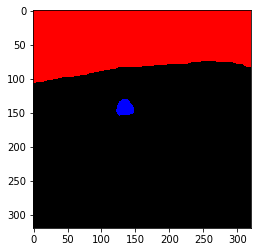

In [16]:
import matplotlib.pyplot as plt
plt.imshow(weighted_pred)

In [13]:
y_true = '/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/clean/clean0001.png'
true = scipy.misc.imresize(scipy.misc.imread(y_true), image_shape)

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


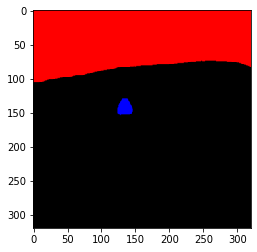

In [14]:
plt.imshow(true)

In [15]:
from keras import backend as K
def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

Using TensorFlow backend.


In [17]:
iou_coef(true,weighted_pred)

NotFoundError: Could not find valid device for node.
Node:{{node Abs}}
All kernels registered for op Abs :
  device='XLA_CPU'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_INT64, DT_BFLOAT16, DT_HALF]
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_INT64, DT_BFLOAT16, DT_HALF]
  device='CPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_INT64]
 [Op:Abs] name: Abs/